http://cdn.gea.esac.esa.int/Gaia/gedr3/cross_match/

In [1]:
import sys
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3


In [2]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

In [50]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

from astroquery.gaia import Gaia

import starcolorindexSpT

print("\nInitialize!")


Initialize!


In [6]:
pd.options.display.max_columns = None

In [9]:
Ipython_default = plt.rcParams.copy()

#plt.style.use('dark_background')

# reset rcParams
#plt.rcParams.update(Ipython_default)

In [10]:
from datetime import datetime

def timer_start():
  global start_time
  start_time = datetime.now()

def timer_stop():
  time_elapsed = datetime.now() - start_time

  da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
  hrs, remainder = divmod(remainder, 3600)
  mins, secs = divmod(remainder, 60)

  if da:
      print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif hrs:
      print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif mins:
      print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
  elif secs >= 1.0:
      print(f'{int(secs)} seconds elapsed')
  else:
      print(f'{secs:.2} seconds elapsed')
        
print('timer functions loaded')

timer functions loaded


In [11]:
def plotSlice3DParmDensityLYPM(r, rtarget, rfield, rlabel, rcmap, rHi):
    
    fig = plt.figure(figsize=(15, 12))
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

    ax = plt.axes(projection='3d')
    
    r1 = r[(r['pmra'].astype(float) > -9999)]
    
    rY = r1[r1.LightYears <= rHi]
    #rY = r[r.LightYears <= 100000]

    # Data for three-dimensional scattered points
    xdata = rY['pmra']
    ydata = rY[rfield]
    zdata = rY['pmdec']

    ax.set_title(str(rtarget) + "  Stars: " + str(len(r)),
             fontsize = 15)

    ax.set_xlabel('PMRA', fontsize = 20)
    ax.set_ylabel(rlabel, fontsize = 20, rotation=45)
    ax.set_zlabel('PMDEC', fontsize = 20)

    ax.set_facecolor('dimgray')
    
    # Calculate the point density
    xyz = np.vstack([xdata, ydata, zdata])
    zzz = gaussian_kde(xyz)(xyz)

    image = ax.scatter3D(xdata, ydata, zdata, s=15, c=ydata, cmap=rcmap)
    
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label('Light Years',size=15)
    plt.close()
    
    ####################################################################################################
    
    
    fig = plt.figure(figsize=(15, 12))
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

    ax = plt.axes(projection='3d')
    
    r1 = r[(r['pmra'].astype(float) > -9999)]
    
    rY = r1[r1.LightYears <= rHi]
    #rY = r[r.LightYears <= 100000]

    # Data for three-dimensional scattered points
    xdata = rY['pmra']
    ydata = rY['T_K']
    zdata = rY['pmdec']

    #ax.set_title(str(rtarget) + "  Stars: " + str(len(r)), fontsize = 15)
    
    ax.text2D(0.05,0.95, str(rtarget) + "  Stars: " + str(len(r)), transform=ax.transAxes, fontsize = 15)
    

    ax.set_xlabel('PMRA', fontsize = 20)
    ax.set_ylabel('Teff', fontsize = 20, rotation=45)
    ax.set_zlabel('PMDEC', fontsize = 20)
    
    """print("xdata = rY['pmra']: Is NAN? " + str(np.isnan(xdata)))
    print("ydata = rY['T_K']: Is NAN? " + str(np.isnan(ydata)))
    print("zdata = rY['pmdec']: Is NAN? " + str(np.isnan(zdata)))
    
    print("xdata = rY['pmra']: Is INF? " + str(np.isinf(xdata)))
    print("ydata = rY['T_K']: Is INF? " + str(np.isinf(ydata)))
    print("zdata = rY['pmdec']: Is INF? " + str(np.isinf(zdata)))"""
    
    xdata = np.nan_to_num(xdata)
    ydata = np.nan_to_num(ydata)
    zdata = np.nan_to_num(zdata)
    
    """xdata = np.inf_to_num(xdata)
    ydata = np.inf_to_num(ydata)
    zdata = np.inf_to_num(zdata)"""

    ax.set_facecolor('dimgray')
    
    # Calculate the point density
    xyz = np.vstack([xdata, ydata, zdata])
    zzz = gaussian_kde(xyz)(xyz)

    image = ax.scatter3D(xdata, ydata, zdata, s=15, c=ydata, cmap="jet_r")
    
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label('Teff',size=15)
    
    #ax.invert_zaxis()
    #ax = plt.gca()
    #plt.gca().invert_yaxis()
    
    plt.gca().set_ylim(r1['T_K'].max(), r1['T_K'].min())
    
    plt.show()
    
    ####################################################################################################
    
    fig = plt.figure(figsize=(15, 12))
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

    ax = plt.axes(projection='3d')
    
    r1 = r[(r['pmra'].astype(float) > -9999)]
    
    rY = r1[r1.LightYears <= rHi]
    #rY = r[r.LightYears <= 100000]

    # Data for three-dimensional scattered points
    xdata = rY['pmra']
    ydata = rY['T_K']
    zdata = rY['kpc']

    #ax.set_title(str(rtarget) + "  Stars: " + str(len(r)), fontsize = 15)
    
    ax.text2D(0.05,0.95, str(rtarget) + "  Stars: " + str(len(r)), transform=ax.transAxes, fontsize = 15)
    

    ax.set_xlabel('PMRA', fontsize = 20)
    ax.set_ylabel('Teff', fontsize = 20, rotation=45)
    ax.set_zlabel('kpc', fontsize = 20)
    
    xdata = np.nan_to_num(xdata)
    ydata = np.nan_to_num(ydata)
    zdata = np.nan_to_num(zdata)

    ax.set_facecolor('dimgray')
    
    # Calculate the point density
    xyz = np.vstack([xdata, ydata, zdata])
    zzz = gaussian_kde(xyz)(xyz)

    image = ax.scatter3D(xdata, ydata, zdata, s=15, c=ydata, cmap="jet_r")
    
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label('Teff',size=15)
    
    #ax.invert_zaxis()
    #ax = plt.gca()
    #plt.gca().invert_yaxis()
    
    plt.gca().set_ylim(r1['T_K'].max(), r1['T_K'].min())
    
    plt.show()
    

In [ ]:
#####################################################################################################################

In [14]:
df1  = pd.read_csv("./Downloads/segue1_match.csv")
df2 = pd.read_csv("./Downloads/segue2_match.csv")
df3 = pd.read_csv("./Downloads/sdss_match.csv")

sdss_segue = pd.concat([df1, df2, df3], ignore_index=True)
starclass = sdss_segue

print("Size: " + str(starclass.shape[0]) + "\n")

subclass = sp.unique(starclass.subClass)

for s in subclass:
    print(str(s) + ": " + str(starclass[starclass.subClass == s]['subClass'].count()))

Size: 507580

A0: 55620
A0p: 1017
B6: 464
B9: 414
CV: 1952
Carbon: 316
CarbonWD: 222
Carbon_lines: 482
F2: 13414
F5: 84986
F9: 109664
G0: 10379
G2: 26662
G5: 1594
K1: 28395
K3: 30347
K5: 26025
K7: 17753
L0: 31
L1: 35
L2: 53
L3: 19
L4: 31
L5: 91
L5.5: 543
L9: 583
M0: 12097
M0V: 1944
M1: 11256
M2: 16148
M2V: 569
M3: 14924
M4: 9853
M5: 5974
M6: 7843
M7: 2387
M8: 708
M9: 421
O: 231
OB: 984
T2: 1072
WD: 9960
WDmagnetic: 117


In [15]:
df1  = pd.read_csv("./Downloads/BOSS_match.csv")
df2 = pd.read_csv("./Downloads/eBOSS_match.csv")

boss = pd.concat([df1, df2], ignore_index=True)
starclass = boss

print("Size: " + str(starclass.shape[0]) + "\n")

subclass = sp.unique(starclass.subClass)

for s in subclass:
    print(str(s) + ": " + str(starclass[starclass.subClass == s]['subClass'].count()))

Size: 314423

A0 (19510): 8
A0IVn (25642): 302
A1III (225180): 1641
A1Iae (12953): 2
A1V (95418): 978
A1m (78209): 16
A2II (39866): 10059
A2Ia (14489): 24
A3Iae (223385): 11
A4 (G_165-39): 69
A4V (136729): 2403
A4V (97603): 4018
A4p (G_37-26): 72
A5II (34578): 1184
A5Ia (17378): 26
A6IV (28527): 324
A8V (155514): 1707
A9V (154660): 2574
Am (78362): 98
B0.5Iae (185859): 6
B0.5Ibe... (187459): 28
B0IVe (5394): 6
B1Ve (212571): 46
B2.5V (175426): 129
B2.5Ve (187811): 2
B2III (35468): 32
B2IV-V (176819): 253
B2Iaevar (41117): 6
B2Ve (164284): 3
B2Vne (202904): 1
B2Vne (58343): 6
B3II (175156): 222
B3Ib/II (51309): 75
B3V (29763): 213
B5 (338529): 1404
B5III (209419): 329
B5Ib (191243): 35
B5V (173087): 33
B6IIIpe (109387): 4
B6IV (174959): 21
B7IVe (209409): 4
B8III (220575): 43
B8IV (171301): 457
B8Ib (208501): 13
B9 (105262): 113
B9.5V+... (37269): 112
B9III (15318): 259
B9Vn (177756): 576
CV: 5019
CalciumWD: 765
Carbon: 674
F0II (25291): 2874
F0III (89025): 1820
F0IV (81937): 15986
F0Ib

In [17]:

#r1 = boss[boss.subClass == "CalciumWD"][0:100]

#r1 = sdss_segue[sdss_segue.subClass == "L9"][0:100]

#r1 = boss[boss.subClass == "A1III (225180)"][0:100]
#r1 = boss[boss.subClass == "A1III (225180)"][100:200]
#r1 = boss[boss.subClass == "A1III (225180)"][200:300]

#r1 = boss[boss.subClass == "A1V (95418)"][0:100]
#r1 = boss[boss.subClass == "A1V (95418)"][100:200]
#r1 = boss[boss.subClass == "A4V (136729)"][0:100]
#r1 = boss[boss.subClass == "A4V (136729)"][100:200]
#r1 = boss[boss.subClass == "A8V (155514)"][0:100]
#r1 = boss[boss.subClass == "A8V (155514)"][100:200]
#r1 = boss[boss.subClass == "A9V (154660)"][0:100]
#r1 = boss[boss.subClass == "A9V (154660)"][100:200]

#r1 = boss[boss.subClass == "B2.5V (175426)"][0:100]
#r1 = boss[boss.subClass == "B3V (29763)"][0:100]
#r1 = boss[boss.subClass == "B3V (29763)"][100:214]

#r1 = boss[boss.subClass == "B5V (173087)"][0:100]

#r1 = boss[boss.subClass == "B5III (209419)"][0:100]
#r1 = boss[boss.subClass == "B5III (209419)"][100:200]

#r1 = boss[boss.subClass == "B9III (15318)"][0:100]
#r1 = boss[boss.subClass == "B9III (15318)"][100:260]


#r1 = boss[boss.subClass == "F0III (89025)"][0:100]
#r1 = boss[boss.subClass == "F0III (89025)"][100:200]

#r1 = boss[boss.subClass == "F2III (89254)"][0:100]
#r1 = boss[boss.subClass == "F2III (89254)"][100:200]

#r1 = boss[boss.subClass == "F6III (61064)"][0:100]
#r1 = boss[boss.subClass == "F6III (61064)"][100:200]
r1 = boss[boss.subClass == "F6III (61064)"][200:300]

#r1 = boss[boss.subClass == "F0V (90277)"][0:100]
#r1 = boss[boss.subClass == "F0V (90277)"][100:200]

#r1 = boss[boss.subClass == "F2V (33256)"][0:100]
#r1 = boss[boss.subClass == "F2V (33256)"][100:200]

#r1 = boss[boss.subClass == "F3/F5V (30743)"][0:100]

#r1 = boss[boss.subClass == "F6V (16673)"][0:100]
#r1 = boss[boss.subClass == "F6V (16673)"][100:200]

#r1 = boss[boss.subClass == "F8V (G_243-63)"][0:100]
#r1 = boss[boss.subClass == "F8V (G_243-63)"][100:200]


#r1 = boss[boss.subClass == "G1V (95128)"][0:100]

#r1 = boss[boss.subClass == "G1V (95128)"][100:200]

#r1 = boss[boss.subClass == "G4V (32923)"][0:100]
#r1 = boss[boss.subClass == "G8V (101501)"][0:100]


#r1 = boss[boss.subClass == "K1V... (25329)"][0:100]
#r1 = boss[boss.subClass == "K3V (32147)"][0:100]

#r1 = boss[boss.subClass == "K1III (18322)"][0:100]
#r1 = boss[boss.subClass == "K2III (115136)"][0:100]
#r1 = boss[boss.subClass == "K3III (101673)"][0:100]

#r1 = boss[boss.subClass == "K4III (136726)"][0:100]
#r1 = boss[boss.subClass == "K4III (136726)"][100:200]

#r1 = boss[boss.subClass == "K5III (111335)"][0:100]

#r1 = boss[boss.subClass == "M0III (168720)"][0:100]

#r1 = boss[boss.subClass == "M3III (44478)"][0:100]
#r1 = boss[boss.subClass == "M3III (44478)"][100:200]

#r1 = boss[boss.subClass == "M6III (148783)"][0:100]
#r1 = boss[boss.subClass == "M6III (148783)"][100:200]


timer_start()


df_result = pd.DataFrame()

for index, row in r1.iterrows():
    source_value = r1.bestObjID[index]
    cmd = str("""SELECT 
                        sdss.original_ext_source_id as bestobjid,
                        gaia_source.source_id,
                        gaia_source.ra,
                        gaia_source.ra_error,
                        gaia_source.dec,
                        gaia_source.dec_error,
                        gaia_source.parallax,
                        gaia_source.parallax_error,
                        gaia_source.pmra,
                        gaia_source.pmra_error,
                        gaia_source.pmdec,
                        gaia_source.pmdec_error,
                        gaia_source.phot_g_mean_mag,
                        gaia_source.phot_bp_mean_mag,
                        gaia_source.phot_rp_mean_mag,
                        gaia_source.bp_rp,
                        gaia_source.bp_g,
                        gaia_source.g_rp,
                        gaia_source.dr2_radial_velocity,
                        gaia_source.dr2_radial_velocity_error
                    FROM gaiaedr3.gaia_source 
                    JOIN gaiaedr3.sdssdr13_best_neighbour as sdss
                    ON gaia_source.source_id = sdss.source_id      
                    WHERE sdss.original_ext_source_id = """ + str(source_value))
    
    #print(cmd)
                
    #      Use for asyncronous queries
    job = Gaia.launch_job_async(cmd, dump_to_file=False)
    
    #      Use for syncronous queries
    #job = Gaia.launch_job(cmd, dump_to_file=False)
    
    #print(job)
    
    data = (job.get_results()).to_pandas()
    #print(data)
    
    df_result = df_result.append(data, ignore_index=True)
        
    
#df_result.to_csv("./Downloads/eBOSS_Class_sdF3_Result.csv")


timer_stop()

print("\nDone!")


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [18]:
r1.head()

Unnamed: 0     specObjID            bestObjID  plate    mjd  fiberID  \
93814       93814  6.624800e+18  1237670965392900375   5884  56046       16   
93912       93912  7.973885e+18  1237651272432419210   7082  56713      952   
93922       93922  5.281704e+18  1237661357535920397   4691  55651      390   
94612       94612  7.497618e+18  1237658614125232430   6659  56607      910   
95062       95062  7.268812e+18  1237667287813062882   6456  56339        8   

            subClass        ra       dec  psfMag_u  psfMag_g  psfMag_r  \
93814  F6III (61064)  157.2710  18.04538  21.55962  20.49474  20.24907   
93912  F6III (61064)  157.3655  64.63692  22.15289  21.07548  20.97696   
93922  F6III (61064)  157.3736  44.09975  21.68311  21.20709  20.97340   
94612  F6III (61064)  158.1008  47.75826  22.21228  21.08826  20.74375   
95062  F6III (61064)  158.6633  28.88177  23.44611  21.25761  20.82966   

       psfMag_i  psfMag_z elodieObject elodieSpType  elodieBV  elodieTEff  \
93814  20.07251  19.76046     HD036395          M1V     1.474        3705   
93912  20.71862  20.29975     HD189509           F5     0.455        6246   
93922  20.96823  20.72270     HD037742    O9.5Ib...    -0.199        9899   
94612  20.62591  20.56219     HD002796           Fw     0.647        4949   
95062  20.74419  20.72103     HD009562         G2IV     0.605        5807   

       elodieLogG  elodieFeH  
93814       4.800       0.60  
93912       4.223      -0.12  
93922       2.924       0.09  
94612       1.320      -2.32  
95062       3.890       0.14

In [19]:
df_result.head()

bestobjid            source_id          ra  ra_error        dec  \
0  1237670965392900375  3890866845460352384  157.271036  0.604229  18.045376   
1  1237651272432419210  1053435424783070208  157.365504  0.732515  64.636841   
2  1237661357535920397   829831455894237312  157.373610  1.010940  44.099739   
3  1237658614125232430   834036744273028224  158.100808  1.519830  47.758253   
4  1237667287813062882   735231605743846912  158.663275  2.453977  28.881749   

   dec_error  parallax  parallax_error     pmra  pmra_error     pmdec  \
0   0.558315  0.605027        0.765990  0.08764    0.860185 -4.921030   
1   0.812632 -0.013430        1.101448 -1.53193    0.928684 -3.554362   
2   1.456868       NaN             NaN      NaN         NaN       NaN   
3   1.600255       NaN             NaN      NaN         NaN       NaN   
4   1.476721       NaN             NaN      NaN         NaN       NaN   

   pmdec_error  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag     bp_rp  \
0     0.835225        20.191189         20.458731         19.863546  0.595184   
1     1.091602        20.857790         20.794554         20.478096  0.316458   
2          NaN        20.944740         21.142900         20.315847  0.827053   
3          NaN        20.761656         21.123020         20.170345  0.952675   
4          NaN        20.902689         21.321861         20.028069  1.293793   

       bp_g      g_rp  dr2_radial_velocity  dr2_radial_velocity_error  
0  0.267542  0.327642                  NaN                        NaN  
1 -0.063236  0.379694                  NaN                        NaN  
2  0.198160  0.628893                  NaN                        NaN  
3  0.361364  0.591311                  NaN                        NaN  
4  0.419172  0.874620                  NaN                        NaN

In [20]:
# Rename lower case bestobjid column to bestObjID for merge matching

df_result = df_result.rename(columns={'bestobjid': 'bestObjID' })

In [21]:
df_result.head()

bestObjID            source_id          ra  ra_error        dec  \
0  1237670965392900375  3890866845460352384  157.271036  0.604229  18.045376   
1  1237651272432419210  1053435424783070208  157.365504  0.732515  64.636841   
2  1237661357535920397   829831455894237312  157.373610  1.010940  44.099739   
3  1237658614125232430   834036744273028224  158.100808  1.519830  47.758253   
4  1237667287813062882   735231605743846912  158.663275  2.453977  28.881749   

   dec_error  parallax  parallax_error     pmra  pmra_error     pmdec  \
0   0.558315  0.605027        0.765990  0.08764    0.860185 -4.921030   
1   0.812632 -0.013430        1.101448 -1.53193    0.928684 -3.554362   
2   1.456868       NaN             NaN      NaN         NaN       NaN   
3   1.600255       NaN             NaN      NaN         NaN       NaN   
4   1.476721       NaN             NaN      NaN         NaN       NaN   

   pmdec_error  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag     bp_rp  \
0     0.835225        20.191189         20.458731         19.863546  0.595184   
1     1.091602        20.857790         20.794554         20.478096  0.316458   
2          NaN        20.944740         21.142900         20.315847  0.827053   
3          NaN        20.761656         21.123020         20.170345  0.952675   
4          NaN        20.902689         21.321861         20.028069  1.293793   

       bp_g      g_rp  dr2_radial_velocity  dr2_radial_velocity_error  
0  0.267542  0.327642                  NaN                        NaN  
1 -0.063236  0.379694                  NaN                        NaN  
2  0.198160  0.628893                  NaN                        NaN  
3  0.361364  0.591311                  NaN                        NaN  
4  0.419172  0.874620                  NaN                        NaN

In [22]:
# Merge with suffix identifies for duplicate column names

df_Merge = pd.merge(r1,df_result, on='bestObjID', suffixes=('_SDSS','_Gaia'))

In [23]:
df_Merge.head()

Unnamed: 0     specObjID            bestObjID  plate    mjd  fiberID  \
0       93814  6.624800e+18  1237670965392900375   5884  56046       16   
1       93912  7.973885e+18  1237651272432419210   7082  56713      952   
2       93922  5.281704e+18  1237661357535920397   4691  55651      390   
3       94612  7.497618e+18  1237658614125232430   6659  56607      910   
4       95062  7.268812e+18  1237667287813062882   6456  56339        8   

        subClass   ra_SDSS  dec_SDSS  psfMag_u  psfMag_g  psfMag_r  psfMag_i  \
0  F6III (61064)  157.2710  18.04538  21.55962  20.49474  20.24907  20.07251   
1  F6III (61064)  157.3655  64.63692  22.15289  21.07548  20.97696  20.71862   
2  F6III (61064)  157.3736  44.09975  21.68311  21.20709  20.97340  20.96823   
3  F6III (61064)  158.1008  47.75826  22.21228  21.08826  20.74375  20.62591   
4  F6III (61064)  158.6633  28.88177  23.44611  21.25761  20.82966  20.74419   

   psfMag_z elodieObject elodieSpType  elodieBV  elodieTEff  elodieLogG  \
0  19.76046     HD036395          M1V     1.474        3705       4.800   
1  20.29975     HD189509           F5     0.455        6246       4.223   
2  20.72270     HD037742    O9.5Ib...    -0.199        9899       2.924   
3  20.56219     HD002796           Fw     0.647        4949       1.320   
4  20.72103     HD009562         G2IV     0.605        5807       3.890   

   elodieFeH            source_id     ra_Gaia  ra_error   dec_Gaia  dec_error  \
0       0.60  3890866845460352384  157.271036  0.604229  18.045376   0.558315   
1      -0.12  1053435424783070208  157.365504  0.732515  64.636841   0.812632   
2       0.09   829831455894237312  157.373610  1.010940  44.099739   1.456868   
3      -2.32   834036744273028224  158.100808  1.519830  47.758253   1.600255   
4       0.14   735231605743846912  158.663275  2.453977  28.881749   1.476721   

   parallax  parallax_error     pmra  pmra_error     pmdec  pmdec_error  \
0  0.605027        0.765990  0.08764    0.860185 -4.921030     0.835225   
1 -0.013430        1.101448 -1.53193    0.928684 -3.554362     1.091602   
2       NaN             NaN      NaN         NaN       NaN          NaN   
3       NaN             NaN      NaN         NaN       NaN          NaN   
4       NaN             NaN      NaN         NaN       NaN          NaN   

   phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag     bp_rp      bp_g  \
0        20.191189         20.458731         19.863546  0.595184  0.267542   
1        20.857790         20.794554         20.478096  0.316458 -0.063236   
2        20.944740         21.142900         20.315847  0.827053  0.198160   
3        20.761656         21.123020         20.170345  0.952675  0.361364   
4        20.902689         21.321861         20.028069  1.293793  0.419172   

       g_rp  dr2_radial_velocity  dr2_radial_velocity_error  
0  0.327642                  NaN                        NaN  
1  0.379694                  NaN                        NaN  
2  0.628893                  NaN                        NaN  
3  0.591311                  NaN                        NaN  
4  0.874620                  NaN                        NaN

In [24]:
df_Merge.to_csv("./Downloads/eBOSS_Class_F6III_Merge3.csv")

In [29]:
B2_5V = pd.read_csv("./Downloads/eBOSS_Class_B2_5V_Merge.csv")

B3V1 = pd.read_csv("./Downloads/eBOSS_Class_B3V_Merge.csv")
B3V2 = pd.read_csv("./Downloads/eBOSS_Class_B3V_Merge2.csv")
B3V = pd.concat([B3V1, B3V2], ignore_index=True)

B5V = pd.read_csv("./Downloads/eBOSS_Class_B5V_Merge.csv")


A1V1 = pd.read_csv("./Downloads/eBOSS_Class_A1V_Merge.csv")
A1V2 = pd.read_csv("./Downloads/eBOSS_Class_A1V_Merge2.csv")
A1V = pd.concat([A1V1, A1V2], ignore_index=True)

A4V1 = pd.read_csv("./Downloads/eBOSS_Class_A4V_Merge.csv")
A4V2 = pd.read_csv("./Downloads/eBOSS_Class_A4V_Merge2.csv")
A4V = pd.concat([A4V1, A4V2], ignore_index=True)

A8V1 = pd.read_csv("./Downloads/eBOSS_Class_A8V_Merge.csv")
A8V2 = pd.read_csv("./Downloads/eBOSS_Class_A8V_Merge2.csv")
A8V = pd.concat([A8V1, A8V2], ignore_index=True)


A9V1 = pd.read_csv("./Downloads/eBOSS_Class_A9V_Merge.csv")
A9V2 = pd.read_csv("./Downloads/eBOSS_Class_A9V_Merge.csv")
A9V = pd.concat([A9V1, A9V2], ignore_index=True)


F0V1 = pd.read_csv("./Downloads/eBOSS_Class_F0V_Merge.csv")
F0V2 = pd.read_csv("./Downloads/eBOSS_Class_F0V_Merge2.csv")
F0V = pd.concat([F0V1, F0V2], ignore_index=True)

F2V1 = pd.read_csv("./Downloads/eBOSS_Class_F2V_Merge.csv")
F2V2 = pd.read_csv("./Downloads/eBOSS_Class_F2V_Merge2.csv")
F2V = pd.concat([F2V1, F2V2], ignore_index=True)

F3_F5V = pd.read_csv("./Downloads/eBOSS_Class_F3_F5V_Merge.csv")

F6V1 = pd.read_csv("./Downloads/eBOSS_Class_F6V_Merge.csv")
F6V2 = pd.read_csv("./Downloads/eBOSS_Class_F6V_Merge2.csv")
F6V = pd.concat([F6V1, F6V2], ignore_index=True)

F8V1 = pd.read_csv("./Downloads/eBOSS_Class_F8V_Merge.csv")
F8V2 = pd.read_csv("./Downloads/eBOSS_Class_F8V_Merge2.csv")
F8V = pd.concat([F8V1, F8V2], ignore_index=True)


G1V1 = pd.read_csv("./Downloads/eBOSS_Class_G1V_Merge.csv")
G1V2 = pd.read_csv("./Downloads/eBOSS_Class_G1V_Merge.csv")
G1V = pd.concat([G1V1, G1V2], ignore_index=True)

G4V = pd.read_csv("./Downloads/eBOSS_Class_G4V_Merge.csv")
G8V = pd.read_csv("./Downloads/eBOSS_Class_G8V_Merge.csv")

K0V  = pd.read_csv("./Downloads/eBOSS_Class_K0V_Merge.csv")
K1V = pd.read_csv("./Downloads/eBOSS_Class_K1V_Merge.csv")
K3V = pd.read_csv("./Downloads/eBOSS_Class_K3V_Merge.csv")



A1III1 = pd.read_csv("./Downloads/eBOSS_Class_A1III_Merge.csv")
A1III2 = pd.read_csv("./Downloads/eBOSS_Class_A1III_Merge2.csv")
A1III3 = pd.read_csv("./Downloads/eBOSS_Class_A1III_Merge3.csv")
A1III = pd.concat([A1III1, A1III2, A1III3], ignore_index=True)

B5III1 = pd.read_csv("./Downloads/eBOSS_Class_B5III_Merge.csv")
B5III2 = pd.read_csv("./Downloads/eBOSS_Class_B5III_Merge2.csv")
B5III = pd.concat([B5III1, B5III2], ignore_index=True)


B9III1 = pd.read_csv("./Downloads/eBOSS_Class_B9III_Merge.csv")
B9III2 = pd.read_csv("./Downloads/eBOSS_Class_B9III_Merge2.csv")
B9III = pd.concat([B9III1, B9III2], ignore_index=True)

F0III1 = pd.read_csv("./Downloads/eBOSS_Class_F0III_Merge.csv")
F0III2 = pd.read_csv("./Downloads/eBOSS_Class_F0III_Merge.csv")
F0III = pd.concat([F0III1, F0III2], ignore_index=True)

F2III = pd.read_csv("./Downloads/eBOSS_Class_F2III_Merge.csv")

F6III1 = pd.read_csv("./Downloads/eBOSS_Class_F6III_Merge.csv")
F6III2 = pd.read_csv("./Downloads/eBOSS_Class_F6III_Merge2.csv")
F6III3 = pd.read_csv("./Downloads/eBOSS_Class_F6III_Merge3.csv")
F6III = pd.concat([F6III1, F6III2, F6III3], ignore_index=True)

K1III = pd.read_csv("./Downloads/eBOSS_Class_K1III_Merge.csv")
K2III = pd.read_csv("./Downloads/eBOSS_Class_K2III_Merge.csv")
K3III = pd.read_csv("./Downloads/eBOSS_Class_K3III_Merge.csv")

K4III1 = pd.read_csv("./Downloads/eBOSS_Class_K4III_Merge.csv")
K4III2 = pd.read_csv("./Downloads/eBOSS_Class_K4III_Merge2.csv")
K4III = pd.concat([K4III1, K4III2], ignore_index=True)

K5III = pd.read_csv("./Downloads/eBOSS_Class_K5III_Merge.csv")

M0III = pd.read_csv("./Downloads/eBOSS_Class_M0III_Merge.csv")

M3III1 = pd.read_csv("./Downloads/eBOSS_Class_M3III_Merge.csv")
M3III2 = pd.read_csv("./Downloads/eBOSS_Class_M3III_Merge2.csv")
M3III = pd.concat([M3III1, M3III2], ignore_index=True)

M5III  = pd.read_csv("./Downloads/eBOSS_Class_M5III_Merge.csv")

M6III1 = pd.read_csv("./Downloads/eBOSS_Class_M6III_Merge.csv")
M6III2 = pd.read_csv("./Downloads/eBOSS_Class_M6III_Merge2.csv")
M6III = pd.concat([M6III1, M6III2], ignore_index=True)


In [10]:
f0  = pd.read_csv("./Downloads/eBOSS_Class_O_Merge.csv")

In [29]:
M1  = pd.read_csv("./Downloads/eBOSS_Class_M1_Merge.csv")

In [32]:
F0II  = pd.read_csv("./Downloads/eBOSS_Class_F0II_Merge.csv")

In [33]:
G0 = pd.read_csv("./Downloads/eBOSS_Class_G0_Merge.csv")

In [35]:
WDhotter = pd.read_csv("./Downloads/eBOSS_Class_WDhotter_Merge.csv")

In [36]:
WDcooler = pd.read_csv("./Downloads/eBOSS_Class_WDcooler_Merge.csv")

In [19]:
WDmagnetic = pd.read_csv("./Downloads/eBOSS_Class_WDmagnetic_Merge.csv")

In [41]:
CalciumWD = pd.read_csv("./Downloads/eBOSS_Class_CalciumWD_Merge.csv")

In [38]:
Ldwarf = pd.read_csv("./Downloads/eBOSS_Class_Ldwarf_Merge.csv")

In [40]:
L9 = pd.read_csv("./Downloads/eBOSS_Class_L9_Merge.csv")

In [37]:
sdF0 = pd.read_csv("./Downloads/eBOSS_Class_sdF0_Merge.csv")

In [39]:
sdF3 = pd.read_csv("./Downloads/eBOSS_Class_sdF3_Merge.csv")

In [32]:
#r1 = pd.concat([A1III, B9III], ignore_index=True)
r1 = A1III

r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_A_giants = r1

target_A_giants = "Class A Giants"

In [33]:
r1 = pd.concat([B5III, B9III], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_B_giants = r1

target_B_giants = "Class B Giants"

In [34]:
r1 = pd.concat([F0III, F2III, F6III], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_F_giants = r1

target_F_giants = "Class F Giants"

In [35]:
r1 = pd.concat([K1III, K2III, K3III, K4III, K5III], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_K_giants = r1

target_K_giants = "Class K Giants"

In [36]:
r1 = pd.concat([M0III, M3III, M5III, M6III], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_M_giants = r1

target_M_giants = "Class M Giants"

In [37]:
r1 = pd.concat([B2_5V, B3V, B5V], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_B_dwarfs = r1

target_B = "Class B Dwarfs"

In [38]:
r1 = pd.concat([A1V, A4V, A8V, A9V], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_A_dwarfs = r1

target_A = "Class A Dwarfs"

In [39]:
r1 = pd.concat([F0V, F2V, F3_F5V, F6V, F8V], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_F_dwarfs = r1

target_F = "Class F Dwarfs"

In [40]:
r1 = pd.concat([G1V, G4V, G8V], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_G_dwarfs = r1

target_G = "Class G Dwarfs"

In [41]:
r1 = pd.concat([K0V, K1V, K3V], ignore_index=True)


r1['Parsec'] =  abs(((1 / r1['parallax']) * 1000))
r1['kpc'] =  abs(((1 / r1['parallax'])))
r1['LY'] = abs(3261.56/r1['parallax'])
r1['kly'] = abs(3261.56/r1['parallax'])/1000
r1['LightYears'] = abs(3261.56/r1['parallax'])

# calculate absolute magnitude and add a new column (M)
r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

# add a new column ('T_K') for effective temperature in Kelvin
r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

class_K_dwarfs = r1

target_K = "Class K Dwarfs"

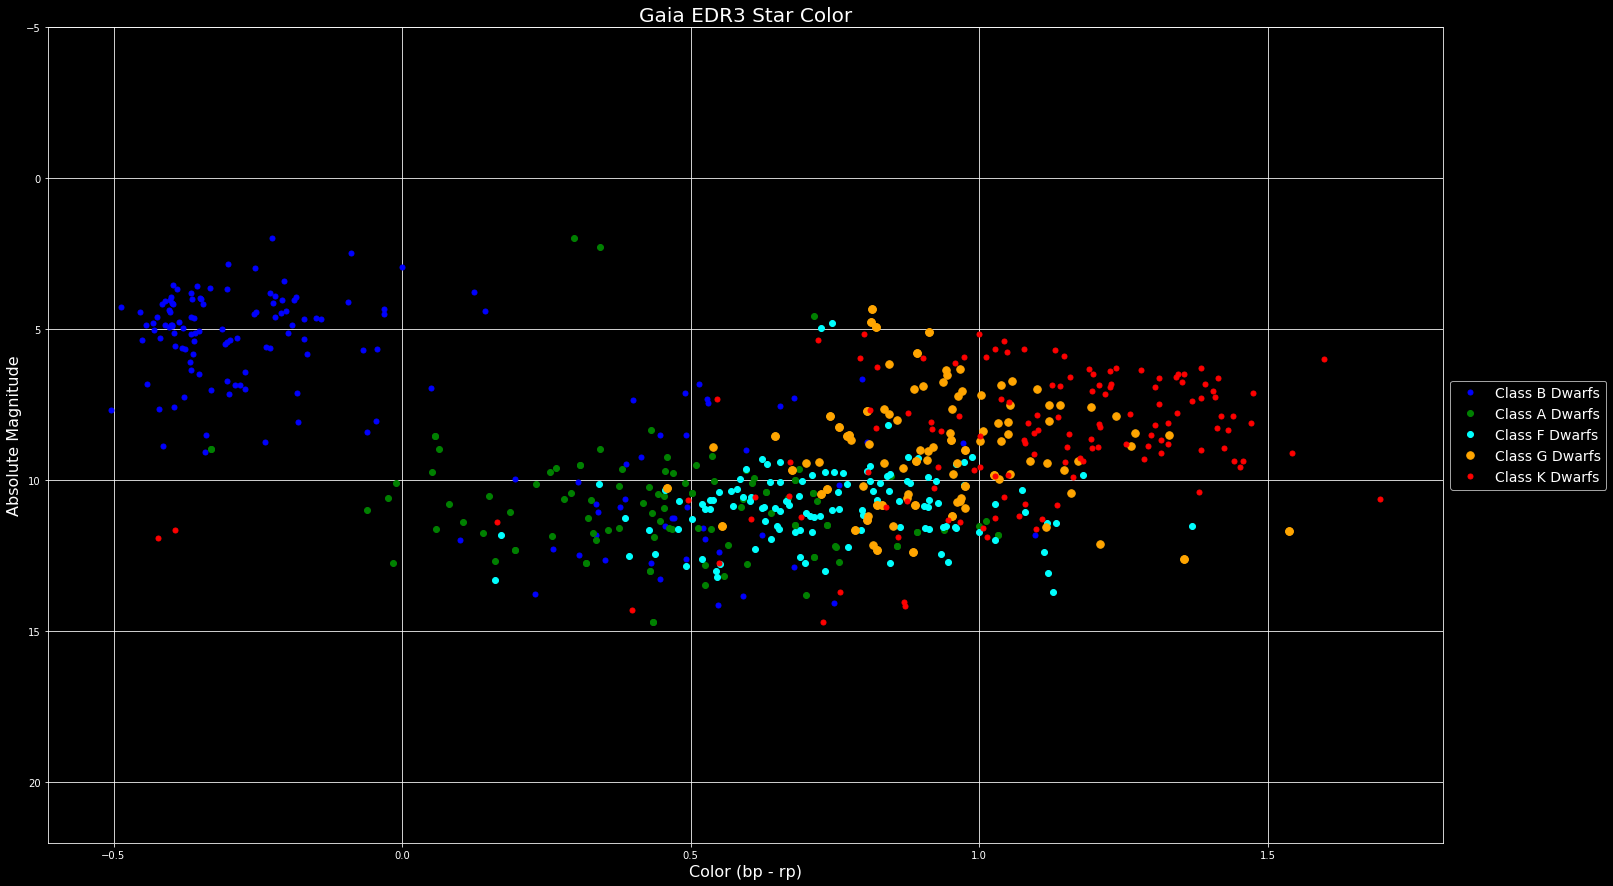

In [42]:
# Alternative to plot.scatter use plt.plot with marker and linewidth=0

x1 = class_B_dwarfs.sort_values(by='LY', ascending=True)[0:200]
x2 = class_A_dwarfs.sort_values(by='LY', ascending=True)[0:200]
x3 = class_F_dwarfs.sort_values(by='LY', ascending=True)[0:200]
x4= class_G_dwarfs.sort_values(by='LY', ascending=True)[0:200]
x5= class_K_dwarfs.sort_values(by='LY', ascending=True)[0:200]

#plt.rcParams.update(Ipython_default)
plt.style.use('dark_background')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

plt.plot(x1.bp_rp, x1.M, color='blue', marker='.', ms=10, linewidth=0, label=target_B)
plt.plot(x2.bp_rp, x2.M, color='green', marker='.', ms=12, linewidth=0, label=target_A)
plt.plot(x3.bp_rp, x3.M, color='aqua', marker='.', ms=12, linewidth=0, label=target_F)
plt.plot(x4.bp_rp, x4.M, color='orange', marker='.', ms=15, linewidth=0, label=target_G)
plt.plot(x5.bp_rp, x5.M, color='red', marker='.', ms=10, linewidth=0, label=target_K)

ax = plt.gca()
ax.set_ylim([22, -5])

plt.xlabel('Color (bp - rp)', fontsize=16)
plt.ylabel('Absolute Magnitude', fontsize=16)
plt.grid()

L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    
plt.title('Gaia EDR3 Star Color', fontsize=20)
    
plt.show()

Class B Dwarfs  BP_RP Mean: 0.1    BP_RP Median: -0.13


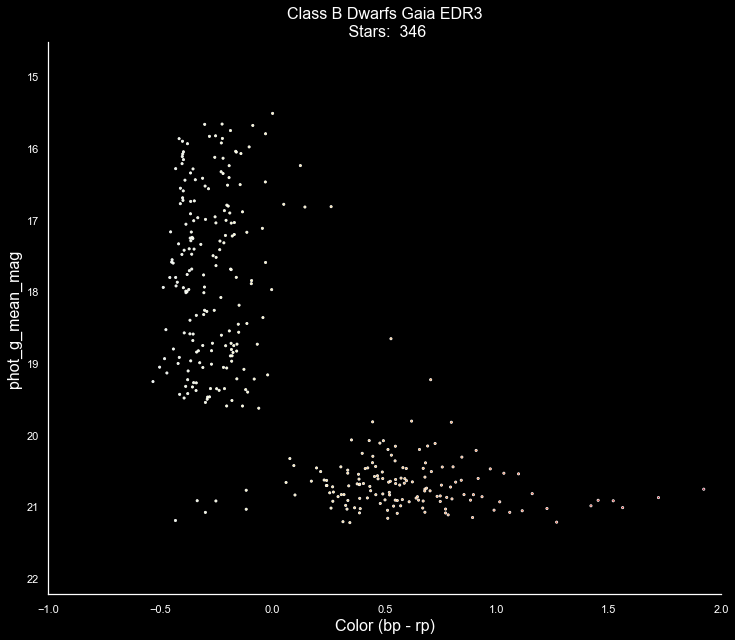

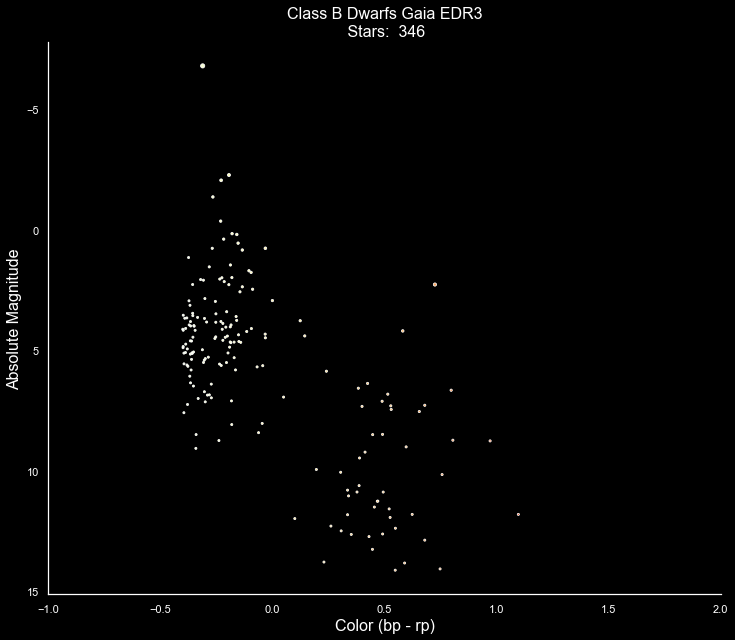

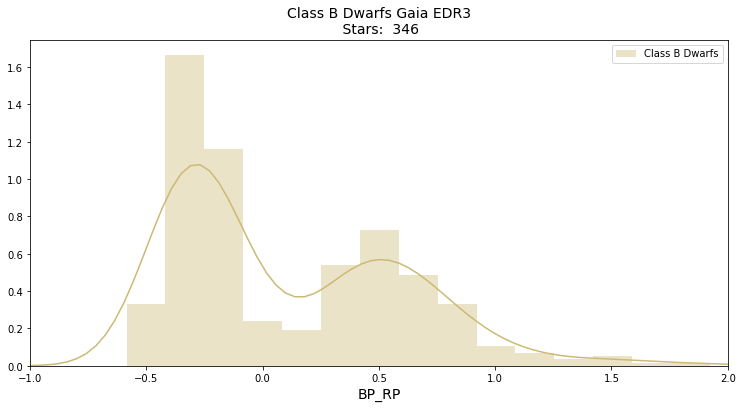



Class A Dwarfs  BP_RP Mean: 0.49    BP_RP Median: 0.5


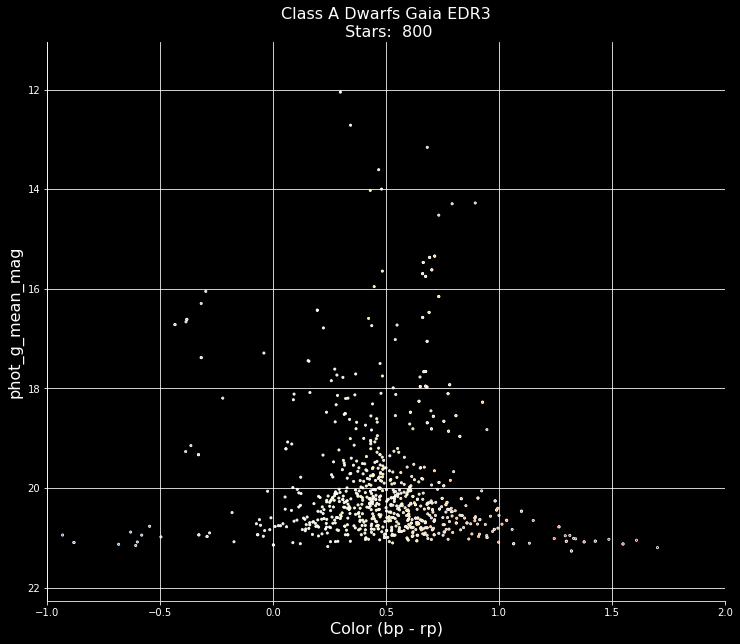

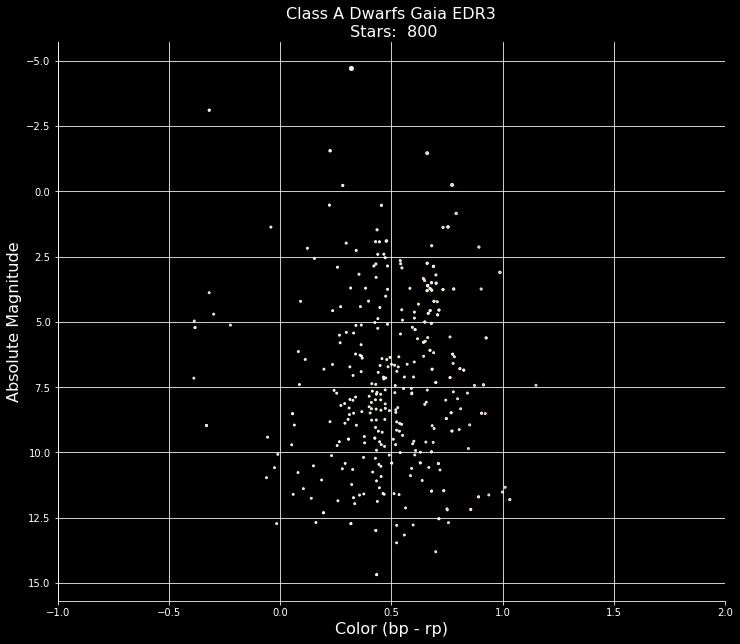

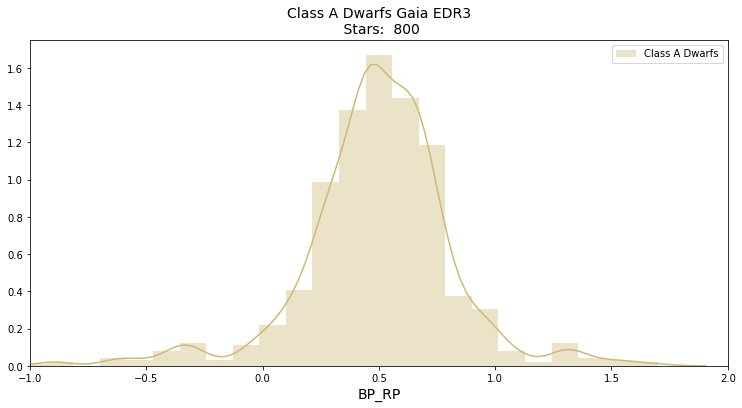



Class F Dwarfs  BP_RP Mean: 0.73    BP_RP Median: 0.74


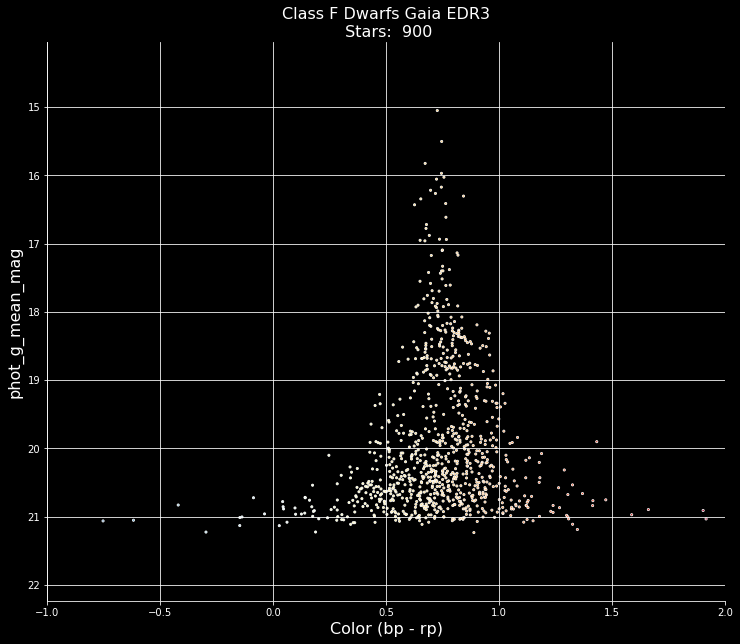

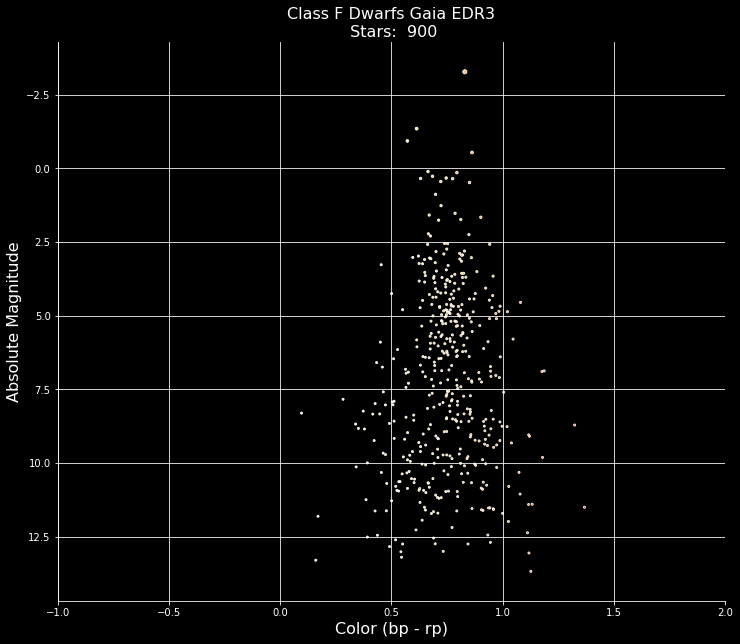

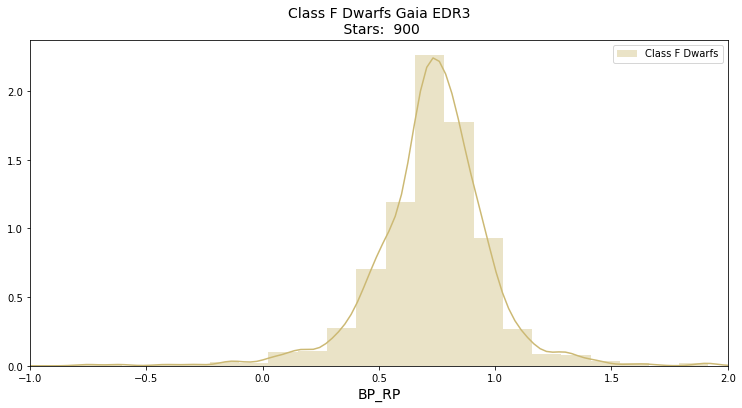



Class G Dwarfs  BP_RP Mean: 0.91    BP_RP Median: 0.92


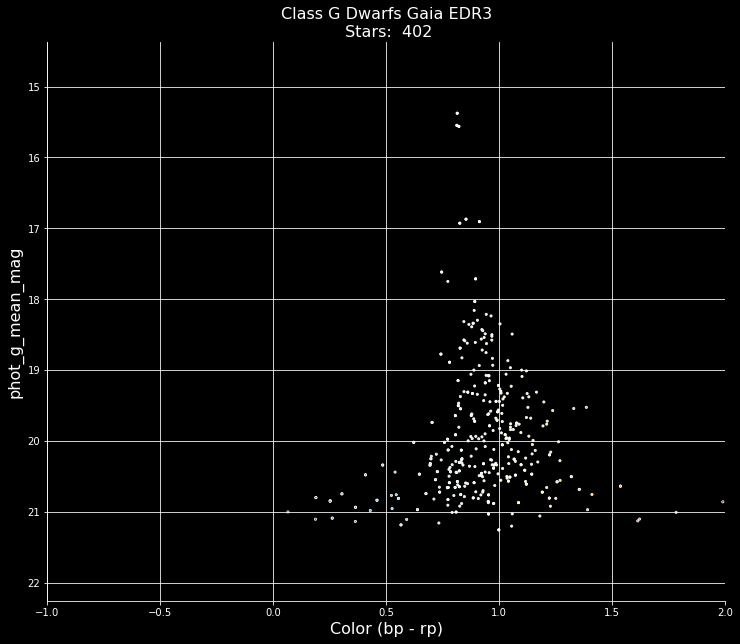

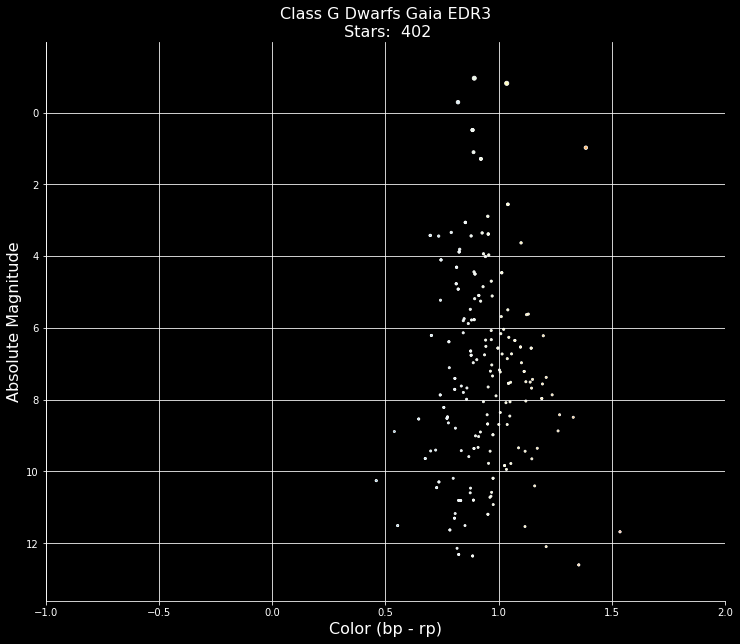

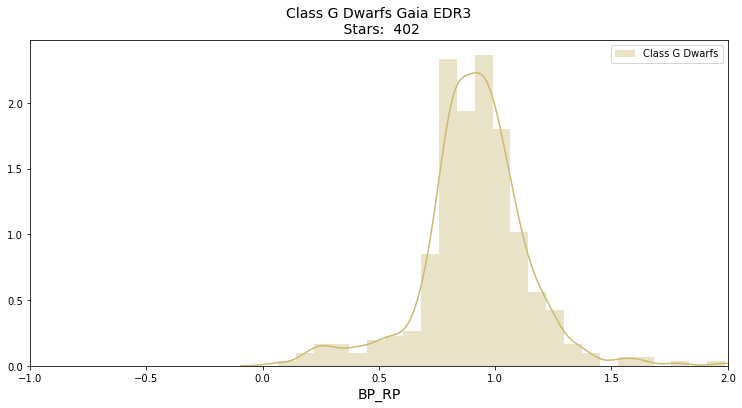



Class K Dwarfs  BP_RP Mean: 1.01    BP_RP Median: 1.06


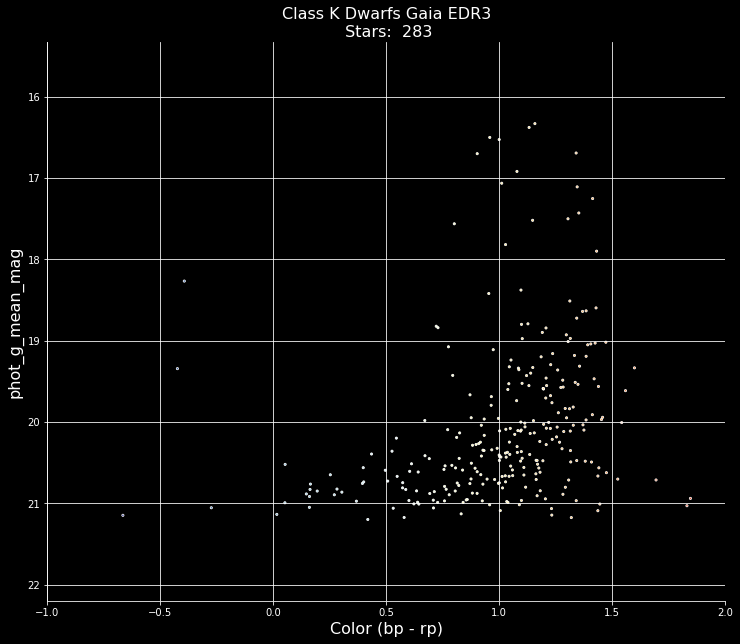

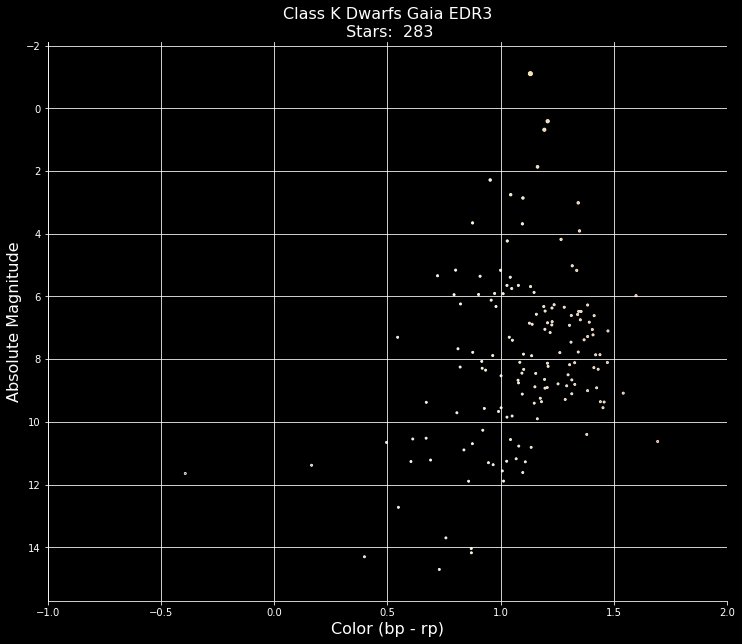

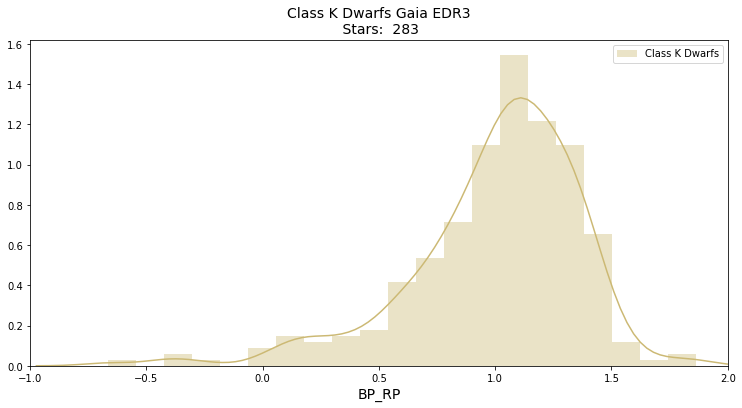

In [45]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
    
    r1 = r
    target = s

    print(str(s) + "  BP_RP Mean: " + str(round(r['bp_rp'].mean(),2)) + 
                   "    BP_RP Median: " + str(round(r['bp_rp'].median(),2)))
    
    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='phot_g_mean_mag', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r', marker='.', s=20,
                data=r1
                )
    plt.xlim(-1, 2)
    plt.ylim(r1['phot_g_mean_mag'].max()+1, r1['phot_g_mean_mag'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('phot_g_mean_mag', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' + '\n Stars:  ' + str(r1.shape[0]), fontsize=16)
    plt.grid()
    plt.show()
    
    
    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='M', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r',
                size='R_sun', marker='.', s=20,
                data=r
                )
    plt.xlim(-1, 2)
    plt.ylim(r1['M'].max()+1, r1['M'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('Absolute Magnitude', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' + '\n Stars:  ' + str(r1.shape[0]), fontsize=16)
    plt.grid()
    plt.show() 
    
  
    plt.rcParams.update(Ipython_default);
    plt.rcParams["figure.figsize"] = "12.5, 6"

    sns.distplot(r['bp_rp'],label=str(s),color='y',bins = 25,kde=True)
    plt.xlabel('BP_RP', fontsize=14)
    plt.xlim(-1, 2)
    plt.title(str(s) + ' Gaia EDR3' + '\n Stars:  ' + str(r.shape[0]), fontsize=14)
    plt.legend()
    plt.show()
    
    print("\n")
    

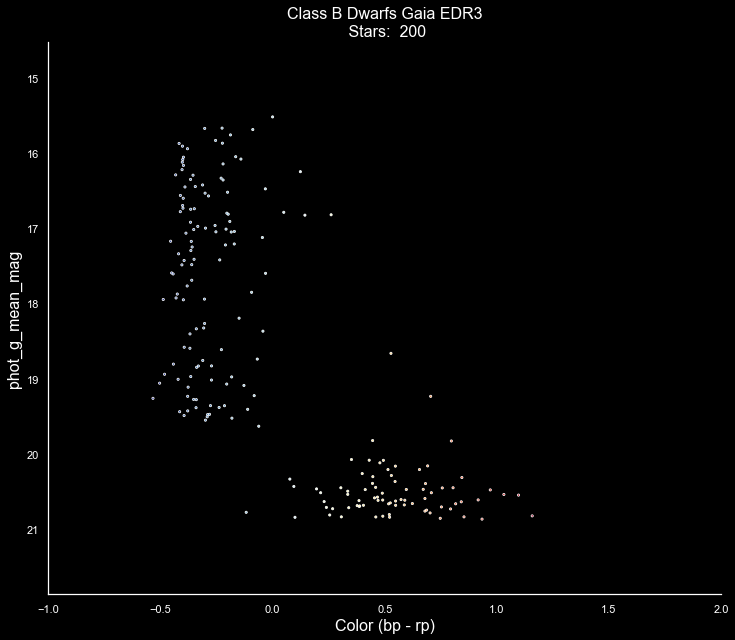

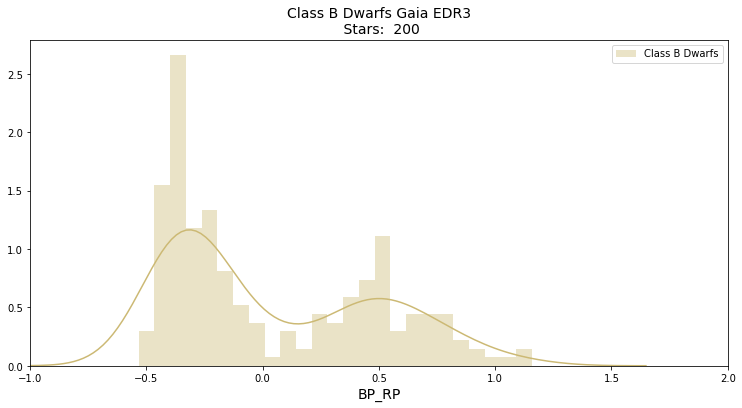

Class B Dwarfs  BP_RP Mean: 0.04    BP_RP Median: -0.18




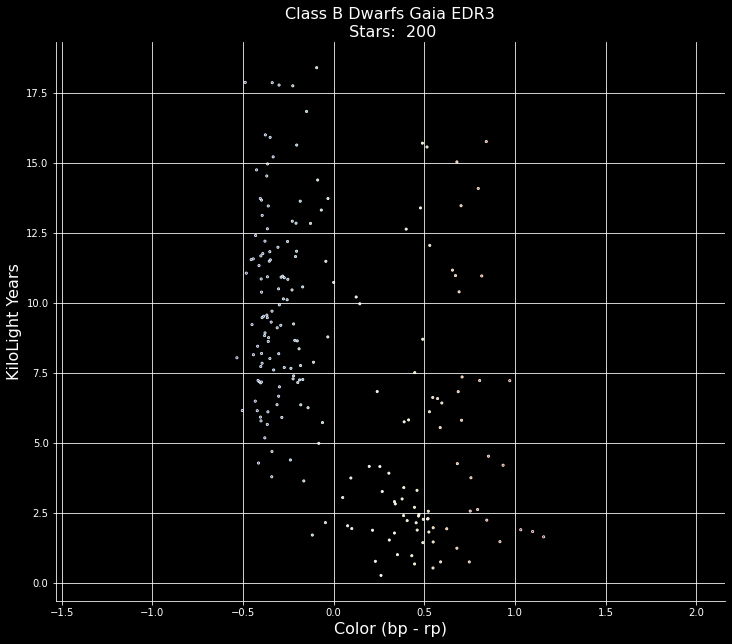


Class B Dwarfs

Class O: 0
Class B: 114
Class A: 23
Class F: 50
Class G: 10
Class K: 2
Class M: 0
Class L: 0
Class T: 0




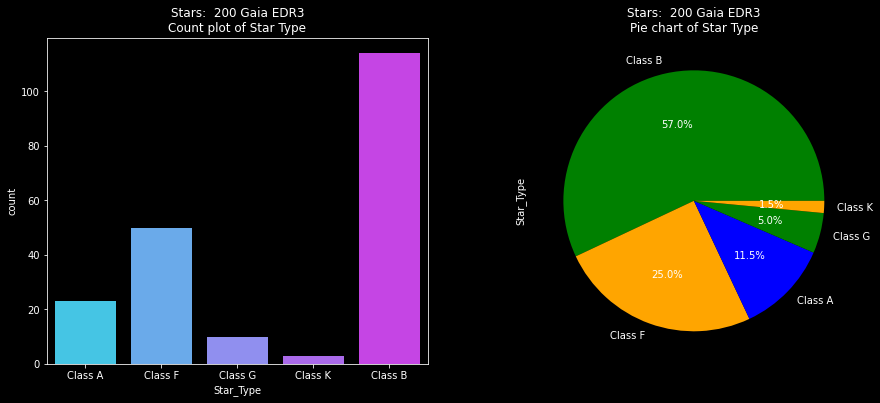

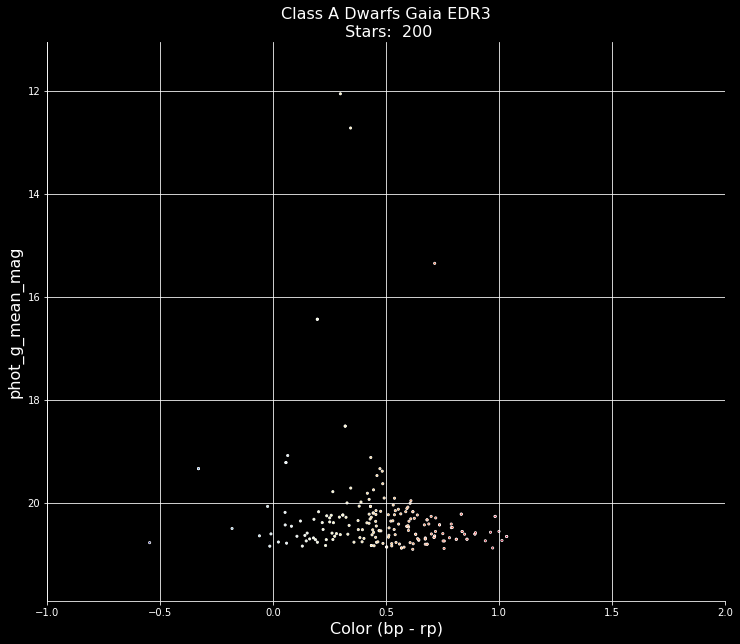

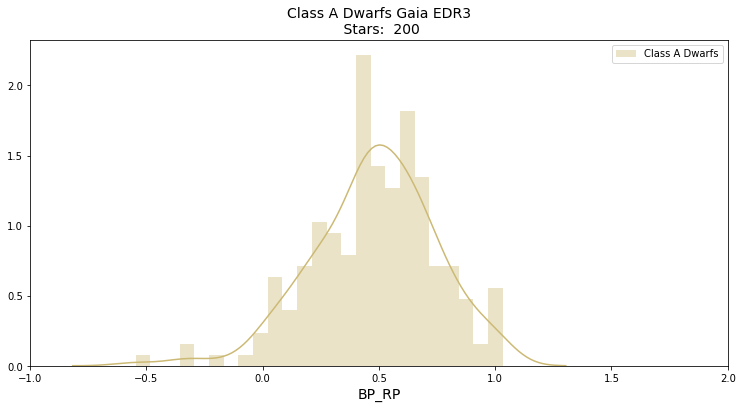

Class A Dwarfs  BP_RP Mean: 0.48    BP_RP Median: 0.49




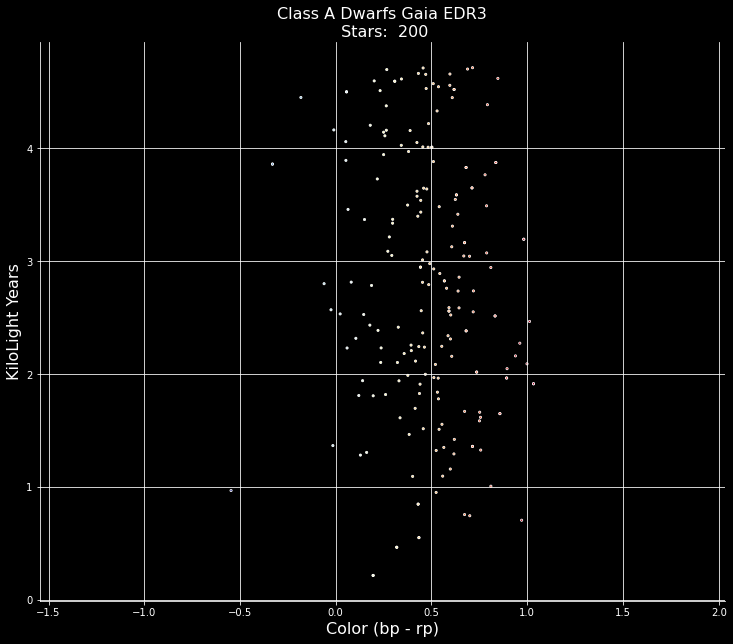


Class A Dwarfs

Class O: 0
Class B: 5
Class A: 53
Class F: 117
Class G: 19
Class K: 2
Class M: 0
Class L: 0
Class T: 0




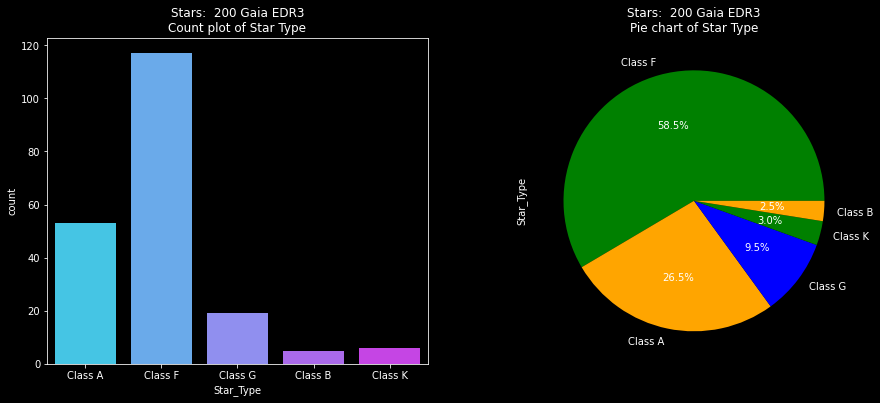

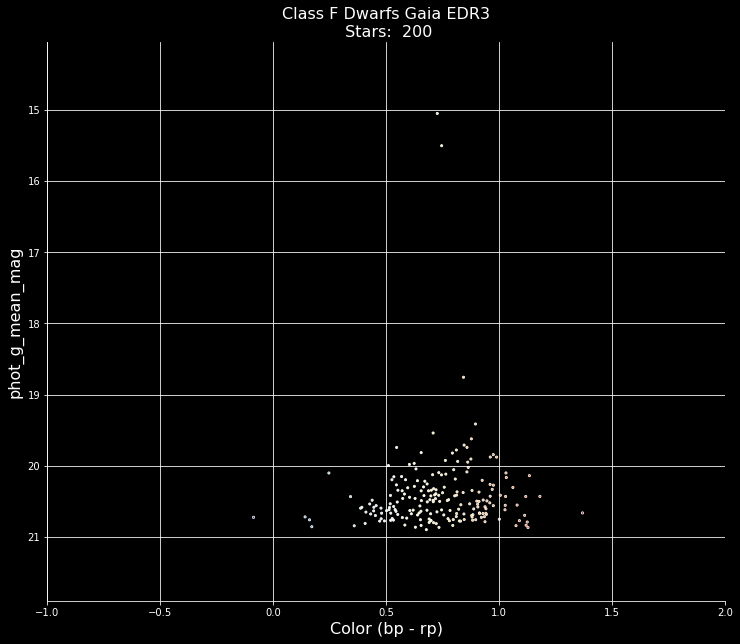

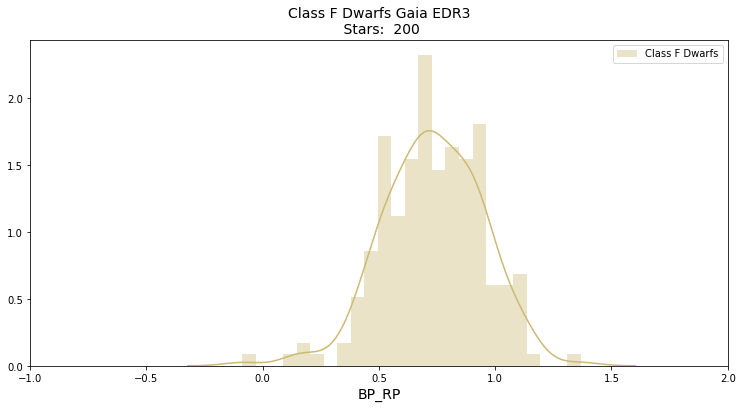

Class F Dwarfs  BP_RP Mean: 0.73    BP_RP Median: 0.73




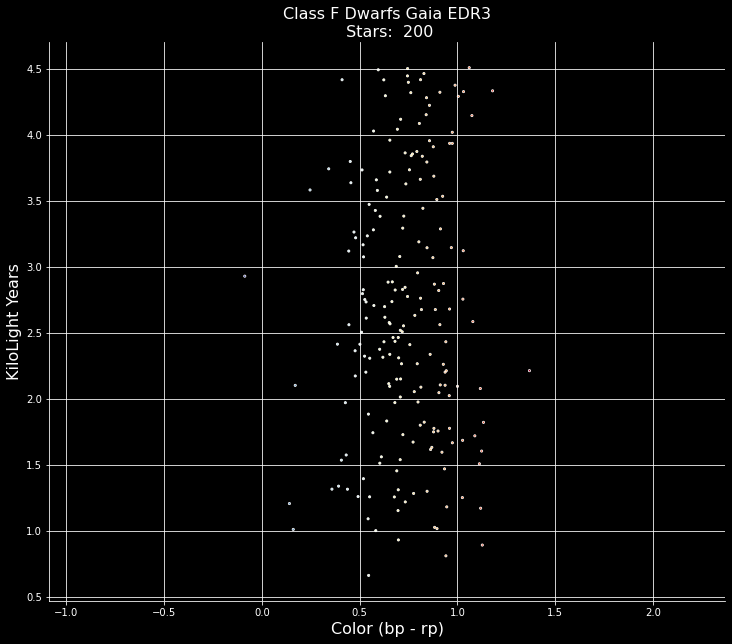


Class F Dwarfs

Class O: 0
Class B: 1
Class A: 6
Class F: 108
Class G: 65
Class K: 13
Class M: 0
Class L: 0
Class T: 0




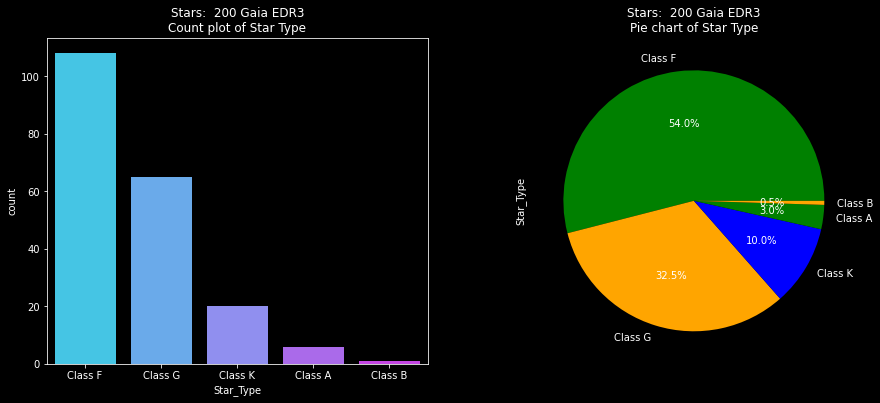

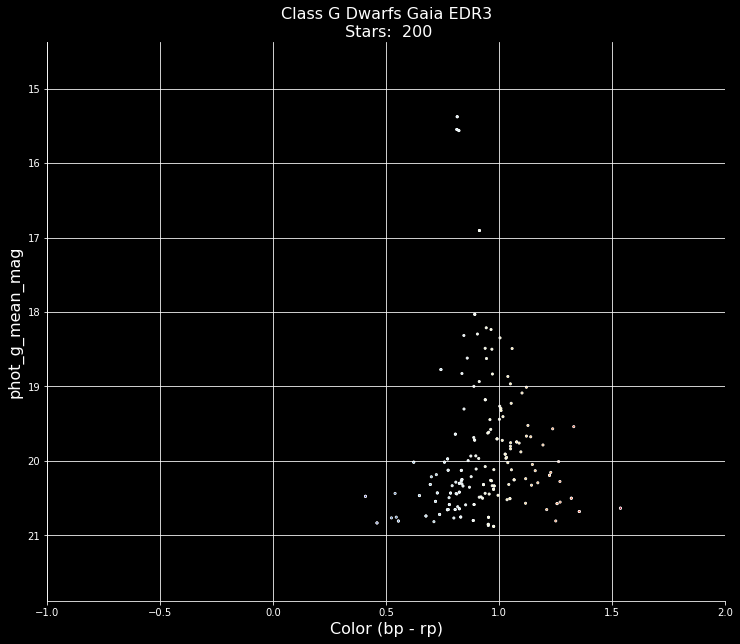

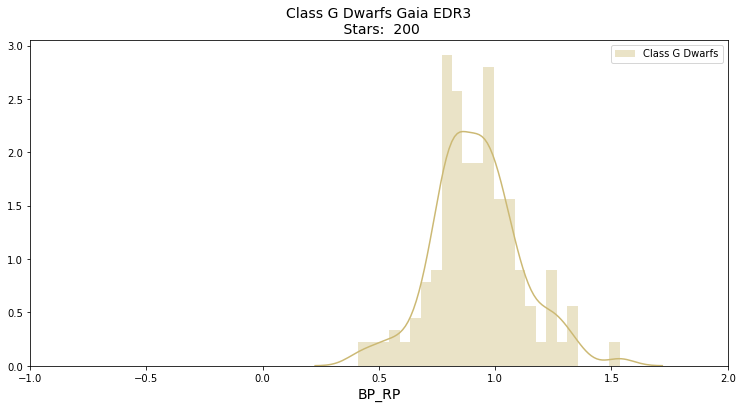

Class G Dwarfs  BP_RP Mean: 0.92    BP_RP Median: 0.91




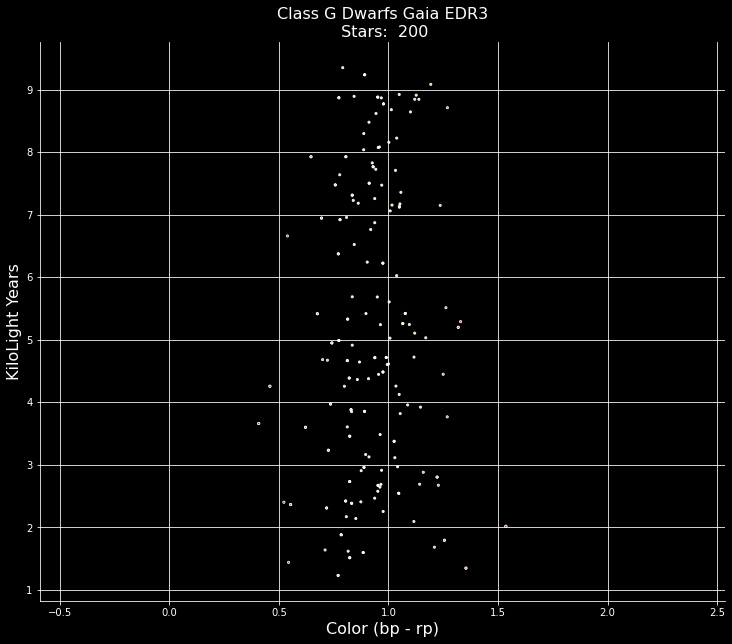


Class G Dwarfs

Class O: 2
Class B: 0
Class A: 0
Class F: 38
Class G: 92
Class K: 53
Class M: 0
Class L: 0
Class T: 0




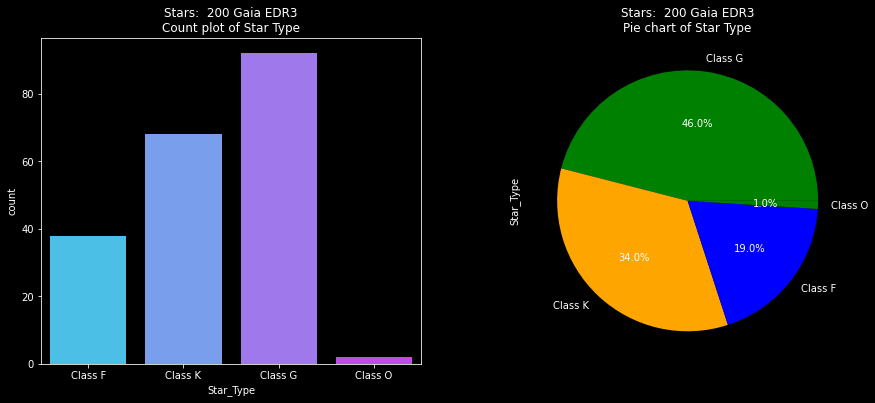

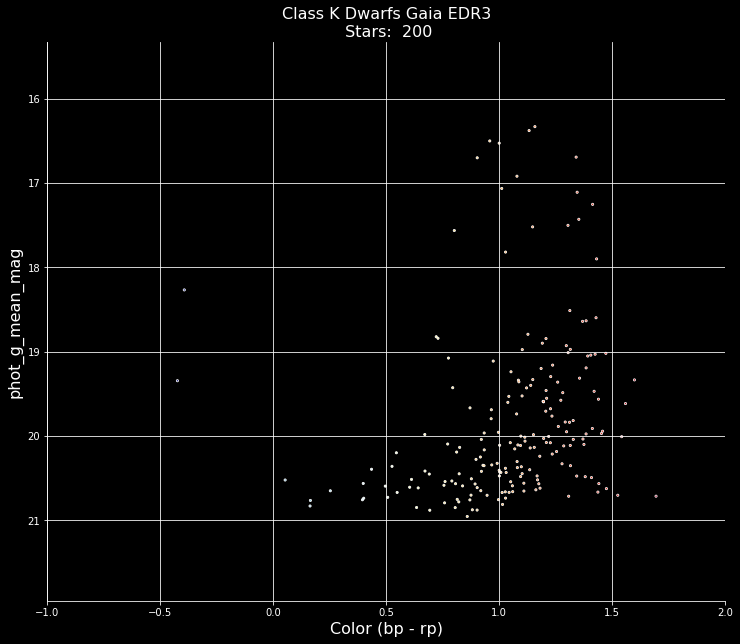

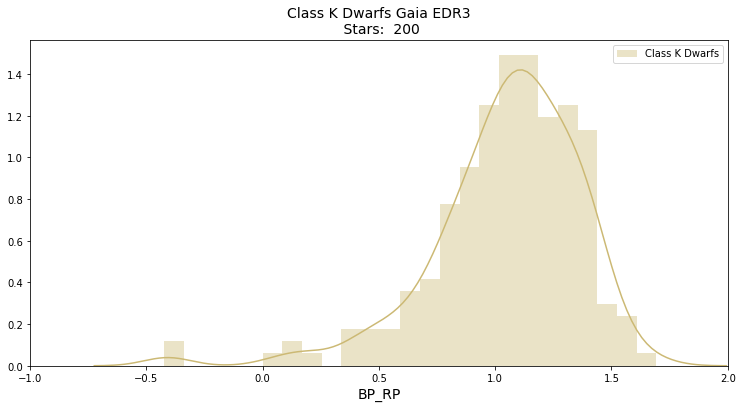

Class K Dwarfs  BP_RP Mean: 1.05    BP_RP Median: 1.09




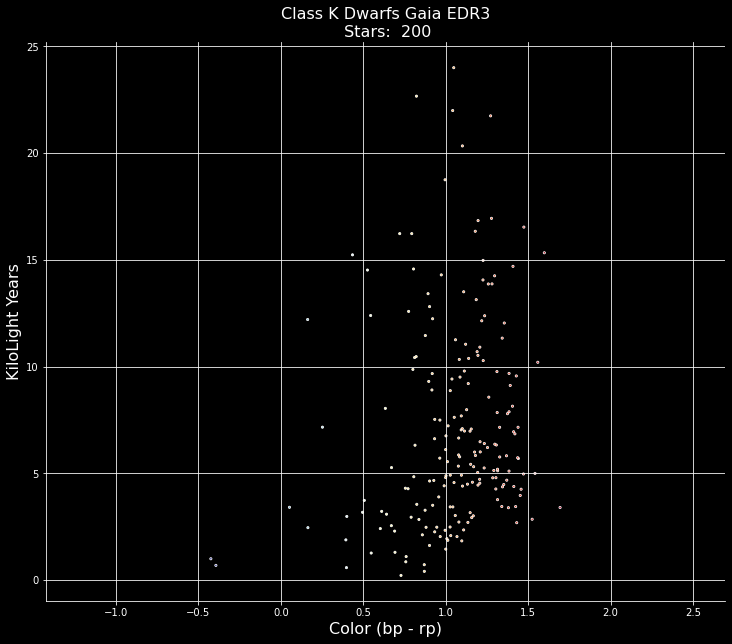


Class K Dwarfs

Class O: 2
Class B: 2
Class A: 4
Class F: 23
Class G: 37
Class K: 113
Class M: 0
Class L: 0
Class T: 0




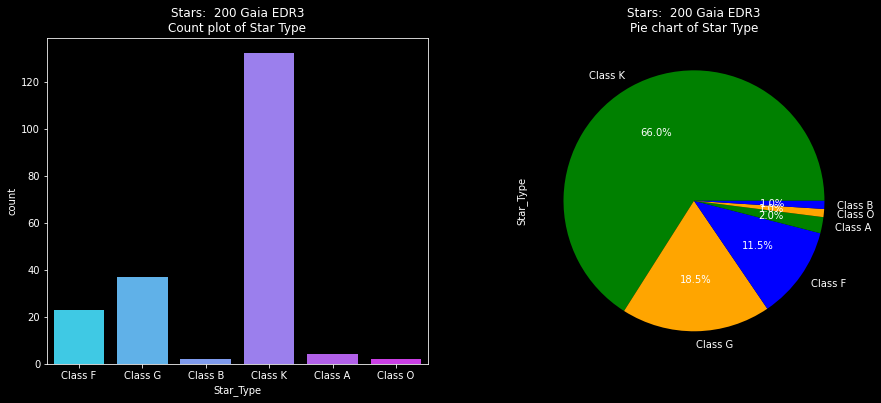

In [46]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
    
    r0 = r.sort_values(by='LY', ascending=True)
    r1 = r0[0:200]
    
    target = s

    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='phot_g_mean_mag', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r', marker='.', s=20,
                data=r1
                )
    plt.xlim(-1, 2)
    plt.ylim(r1['phot_g_mean_mag'].max()+1, r1['phot_g_mean_mag'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('phot_g_mean_mag', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' + '\n Stars:  ' + str(r1.shape[0]), fontsize=16)
    plt.grid()
    plt.show()
    
    #print("\n")
    
    plt.rcParams.update(Ipython_default);
    plt.rcParams["figure.figsize"] = "12.5, 6"

    sns.distplot(r1['bp_rp'],label=str(s),color='y',bins = 25,kde=True)
    plt.xlabel('BP_RP', fontsize=14)
    plt.xlim(-1, 2)
    plt.title(str(s) + ' Gaia EDR3' + '\n Stars:  ' + str(r1.shape[0]), fontsize=14)
    plt.legend()
    plt.show()
    
    
    print(str(s) + "  BP_RP Mean: " + str(round(r1['bp_rp'].mean(),2)) + 
                   "    BP_RP Median: " + str(round(r1['bp_rp'].median(),2)))
    
    print("\n")
    
    
    
    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='kly', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r', marker='.', s=20,
                data=r1
                )
    #plt.xlim(0.01, 800)
    #plt.xlim(r1['bp_rp'].max()+1, r1['bp_rp'].min()-1)
    plt.xlim(r1['bp_rp'].min()-1, r1['bp_rp'].max()+1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('KiloLight Years', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' +
             '\n Stars:  ' + str(r1.shape[0]), fontsize=16)
    plt.grid()
    plt.show()
    
    
    
    
    
    
    #plotSlice3DParmDensityLYPM(r, str(s),  "LightYears", "LY", "jet", 100000)
    
    
    f1 = r1
    
    print("\n" + str(s))

    df_class_O = f1[(f1['SpT2'] >= "O0V") & (f1['SpT2'] <= "O9V")]
    df_class_B = f1[(f1['SpT2'] >= "B0V") & (f1['SpT2'] <= "B9V")]
    df_class_A = f1[(f1['SpT2'] >= "A0V") & (f1['SpT2'] <= "A9V")]
    df_class_F = f1[(f1['SpT2'] >= "F0V") & (f1['SpT2'] <= "F9V")]
    df_class_G = f1[(f1['SpT2'] >= "G0V") & (f1['SpT2'] <= "G9V")]
    df_class_K = f1[(f1['SpT2'] >= "K0V") & (f1['SpT2'] <= "K9V")]
    df_class_M = f1[(f1['SpT2'] >= "M0V") & (f1['SpT2'] <= "M9V")]
    df_class_L = f1[(f1['SpT2'] >= "L0V") & (f1['SpT2'] <= "L9V")]
    df_class_T = f1[(f1['SpT2'] >= "T0V") & (f1['SpT2'] <= "T9V")]

    print("\nClass O: " + str(df_class_O.shape[0]))
    print("Class B: " + str(df_class_B.shape[0]))
    print("Class A: " + str(df_class_A.shape[0]))
    print("Class F: " + str(df_class_F.shape[0]))
    print("Class G: " + str(df_class_G.shape[0]))
    print("Class K: " + str(df_class_K.shape[0]))
    print("Class M: " + str(df_class_M.shape[0]))
    print("Class L: " + str(df_class_L.shape[0]))
    print("Class T: " + str(df_class_T.shape[0]))
    print("\n")

    f1['Star_Type'] = ""
    f1['Star_Type'] = np.where(f1.SpT2.between('O0', 'O9V'), 'Class O', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('B0', 'B9V'), 'Class B', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('A0', 'A9V'), 'Class A', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('F0', 'F9V'), 'Class F', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('G0', 'G9V'), 'Class G', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('K0', 'K9V'), 'Class K', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('M0', 'M9.5V'), 'Class M', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('L0', 'L9.5V'), 'Class L', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('T0', 'T9.5V'), 'Class T', f1['Star_Type'])

    ####################################################################################################

    plt.style.use('dark_background')
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.countplot(x = 'Star_Type' , palette= 'cool', data= f1) 
    plt.title(str('Stars:  ' + str(r1.shape[0])) + ' Gaia EDR3'  + "\nCount plot of Star Type")

    plt.subplot(1,2,2)
    count = f1['Star_Type'].value_counts()
    count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'],
           title = str('Stars:  ' + str(r1.shape[0])) + ' Gaia EDR3'  + "\nPie chart of Star Type")
    plt.show()
    
    print("\n")
    
    
    
    

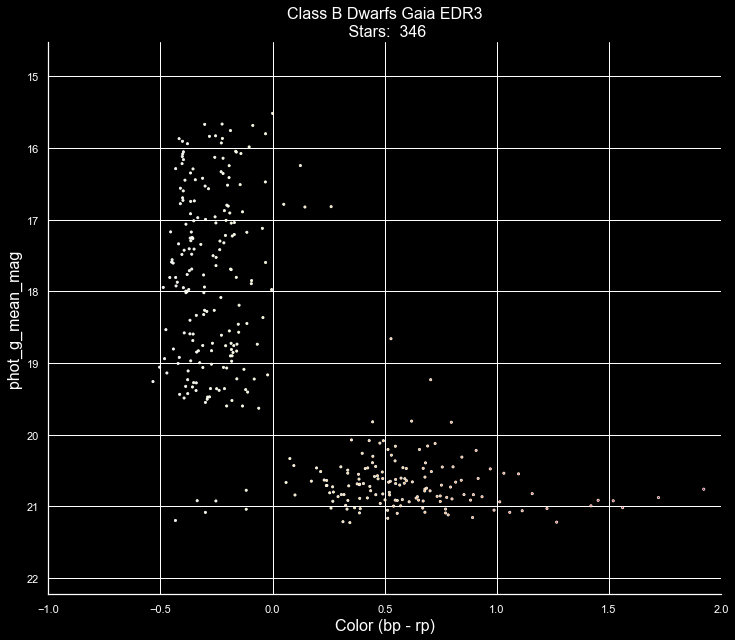

Class B Dwarfs  BP_RP Mean: 0.1    BP_RP Median: -0.13




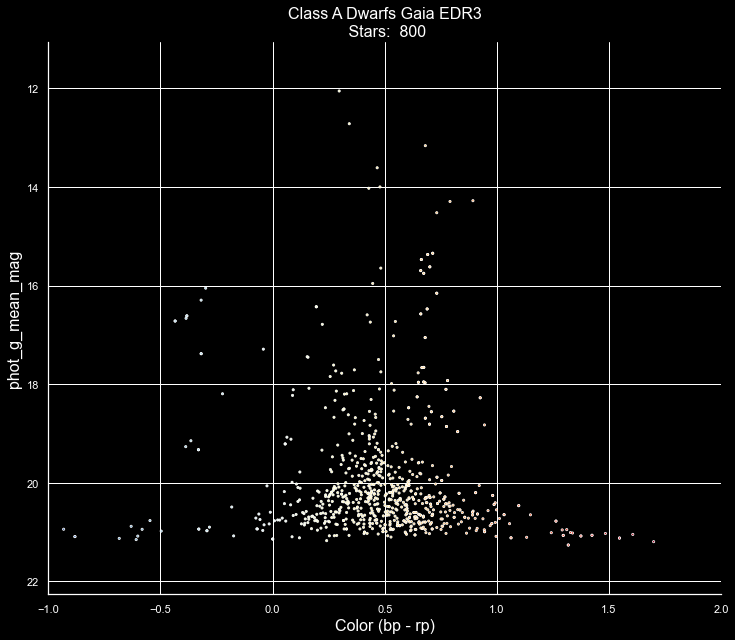

Class A Dwarfs  BP_RP Mean: 0.49    BP_RP Median: 0.5




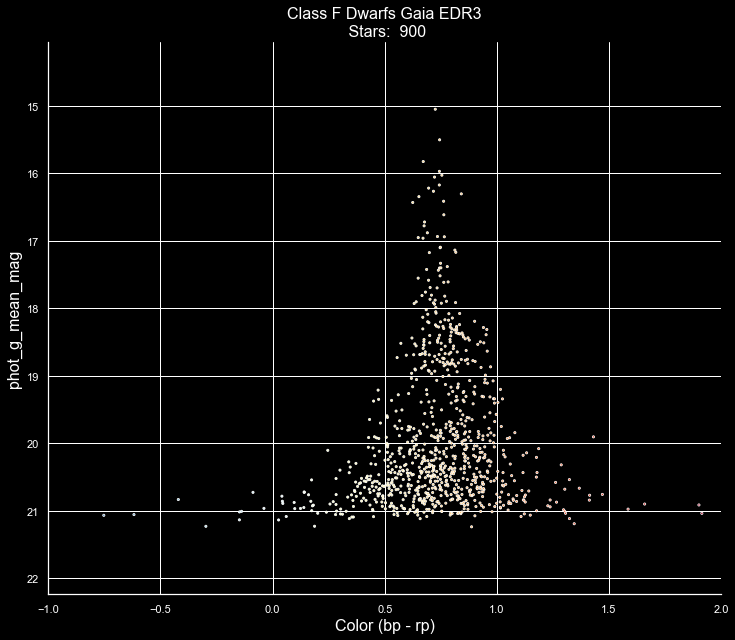

Class F Dwarfs  BP_RP Mean: 0.73    BP_RP Median: 0.74




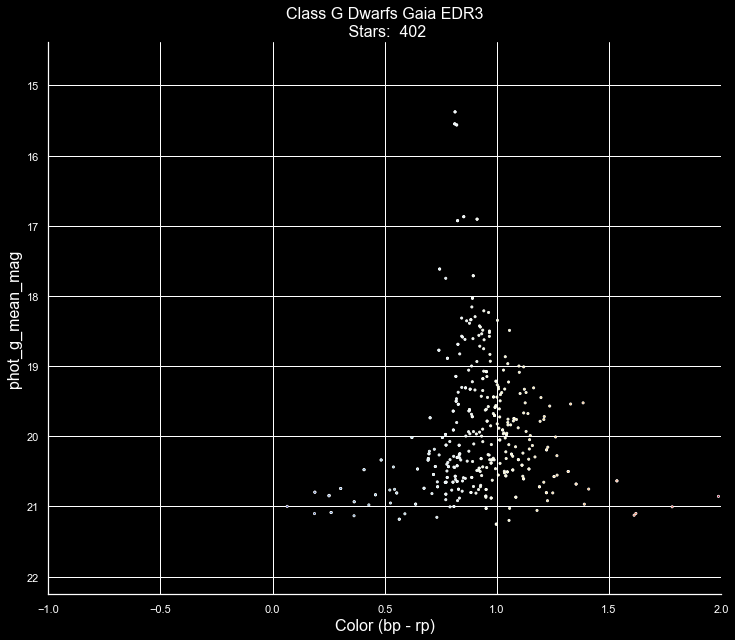

Class G Dwarfs  BP_RP Mean: 0.91    BP_RP Median: 0.92




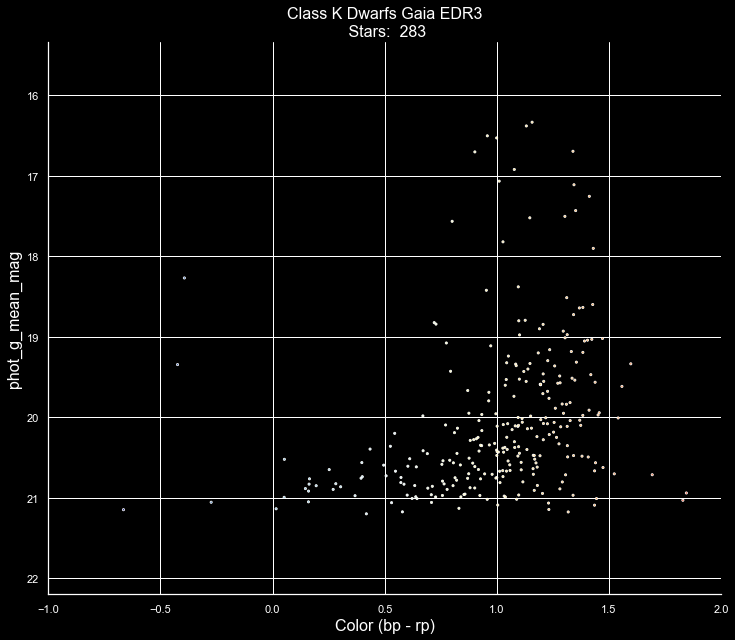

Class K Dwarfs  BP_RP Mean: 1.01    BP_RP Median: 1.06




In [47]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
    r1 = r
    target = s

    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='phot_g_mean_mag', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r', marker='.', s=20,
                data=r1
                )
    plt.xlim(-1, 2)
    plt.ylim(r1['phot_g_mean_mag'].max()+1, r1['phot_g_mean_mag'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('phot_g_mean_mag', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' +
             '\n Stars:  ' + str(r1.shape[0]), fontsize=16)
    #plt.grid()
    plt.show()
    
    
    print(str(s) + "  BP_RP Mean: " + str(round(r['bp_rp'].mean(),2)) + 
                   "    BP_RP Median: " + str(round(r['bp_rp'].median(),2)))
    
    print("\n")

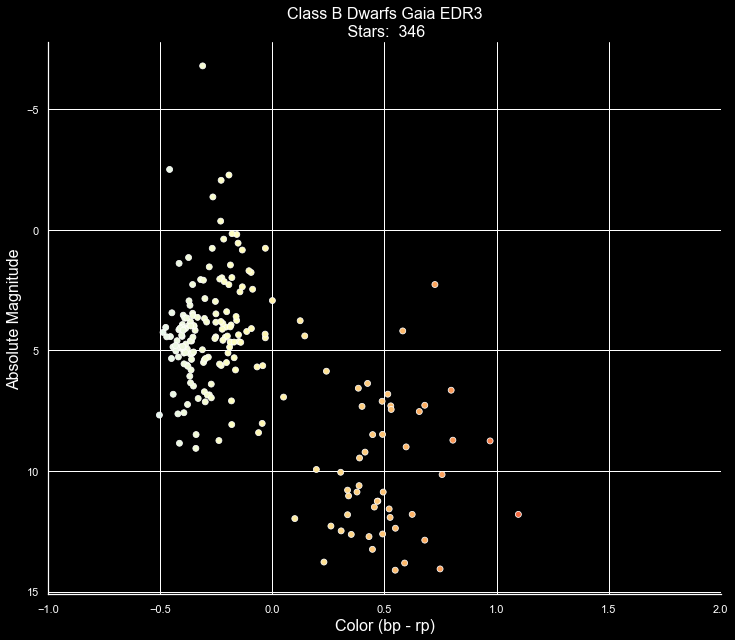

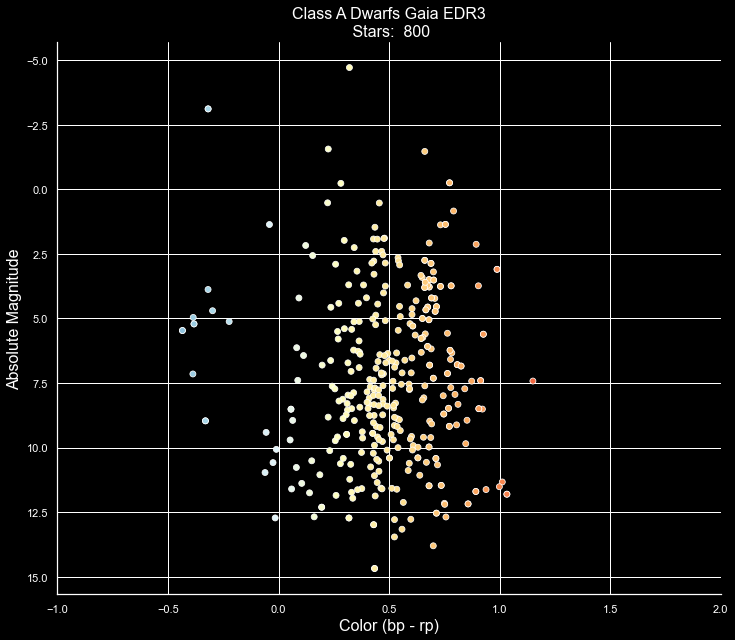

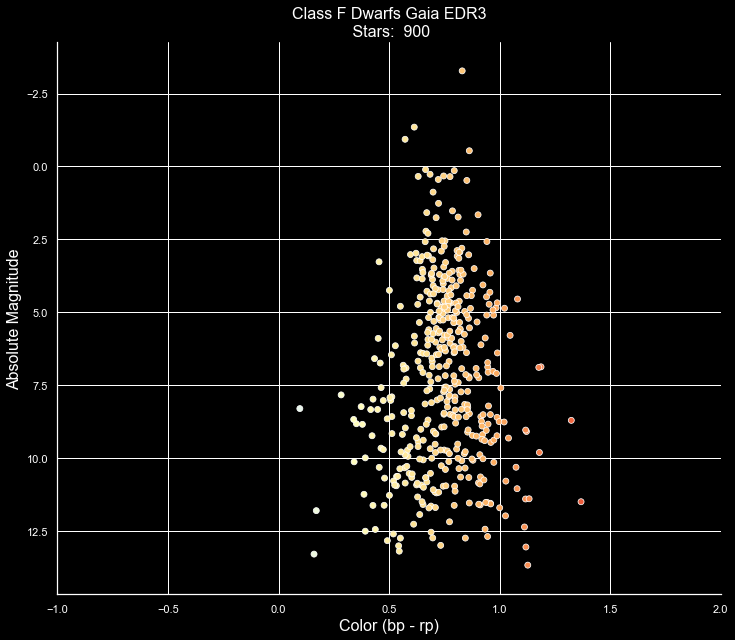

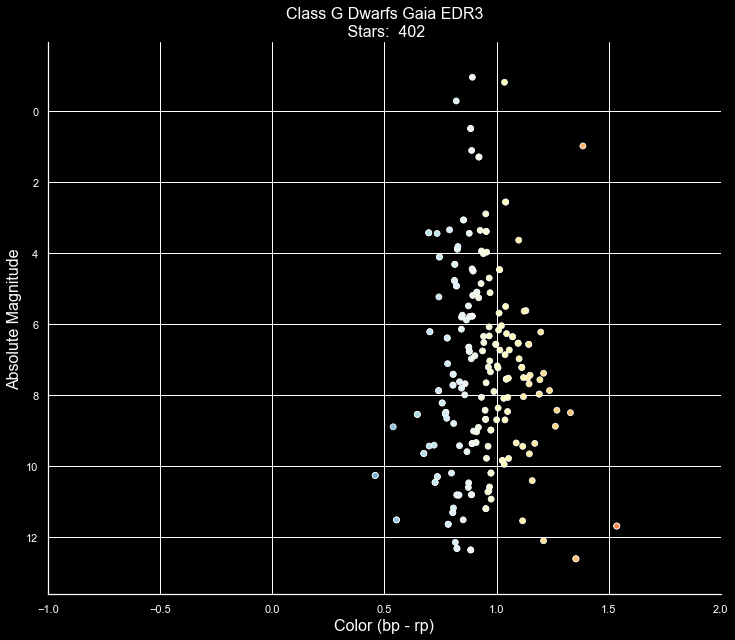

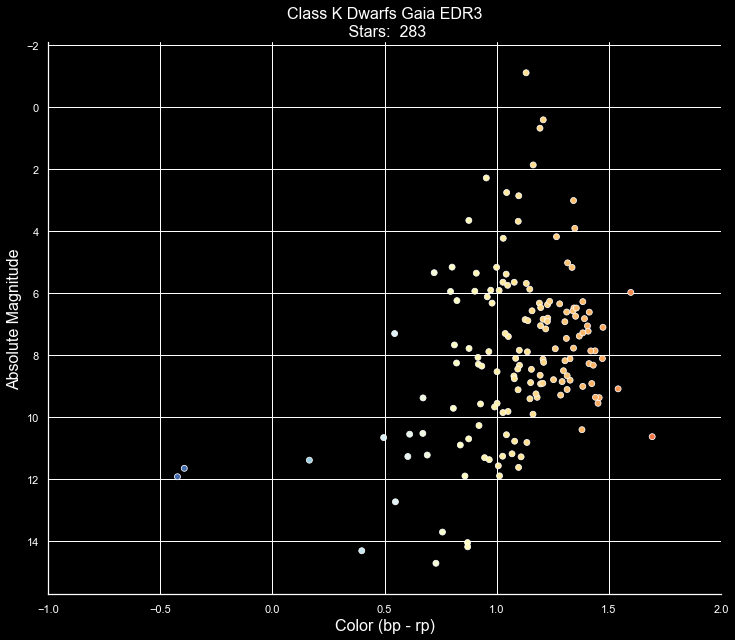

In [48]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
    r1 = r
    target = s

    plt.style.use('dark_background')
    sns.relplot(x='bp_rp', y='M', height=8.5, aspect=1.2, legend=None,
                hue='bp_rp',
                palette='RdYlBu_r',
                #size='R_sun', marker='.', s=20,
                #sizes=(10,rr1['R_sun'].max()/rr1['R_sun'].min()),
                sizes=(1,r1['R_sun'].max()/r1['R_sun'].min()),
                data=r
                )
    plt.xlim(-1, 2)
    plt.ylim(r1['M'].max()+1, r1['M'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=16)
    plt.ylabel('Absolute Magnitude', fontsize=16)
    plt.title(str (target) + ' Gaia EDR3' +
             '\n Stars:  ' + str(r1.shape[0]), fontsize=16)

    plt.show() 
    
    print("\n")

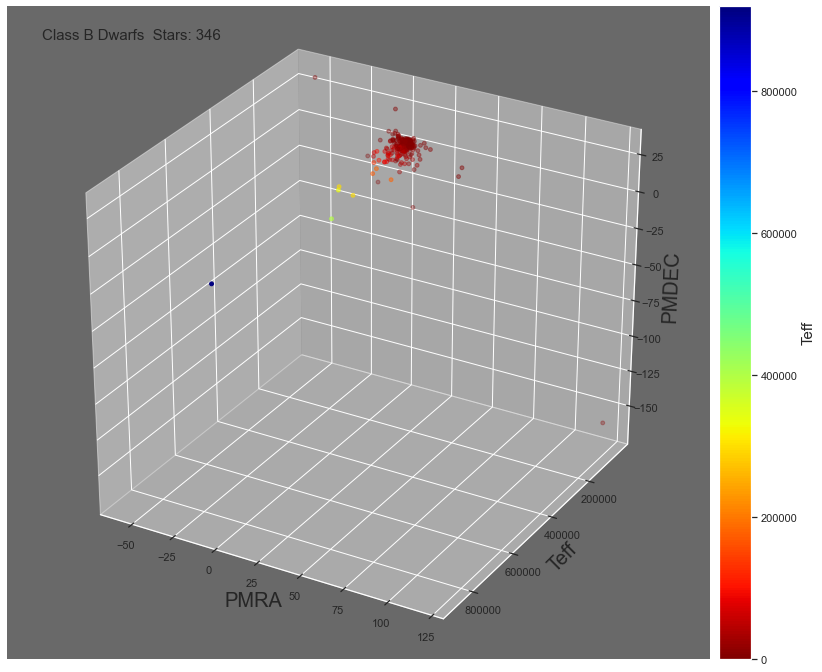

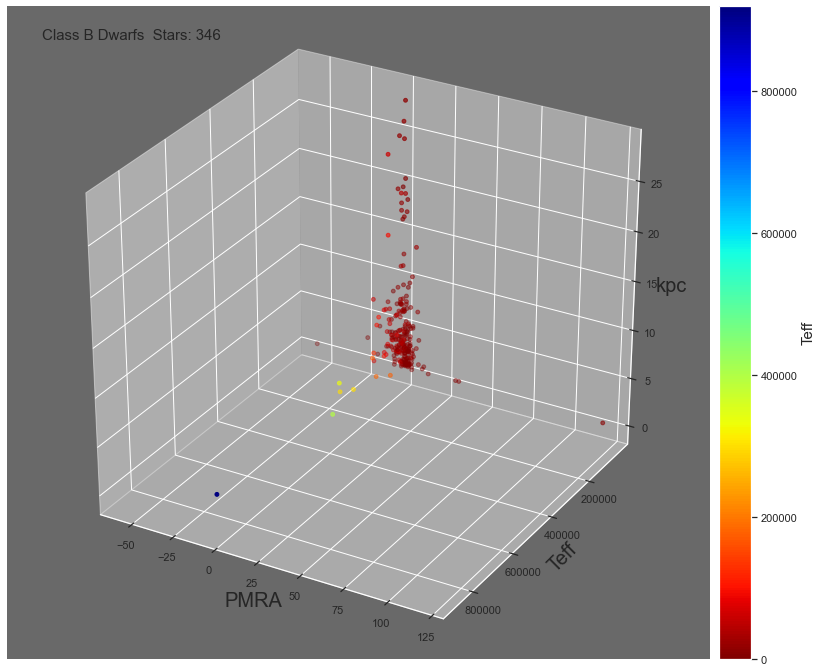

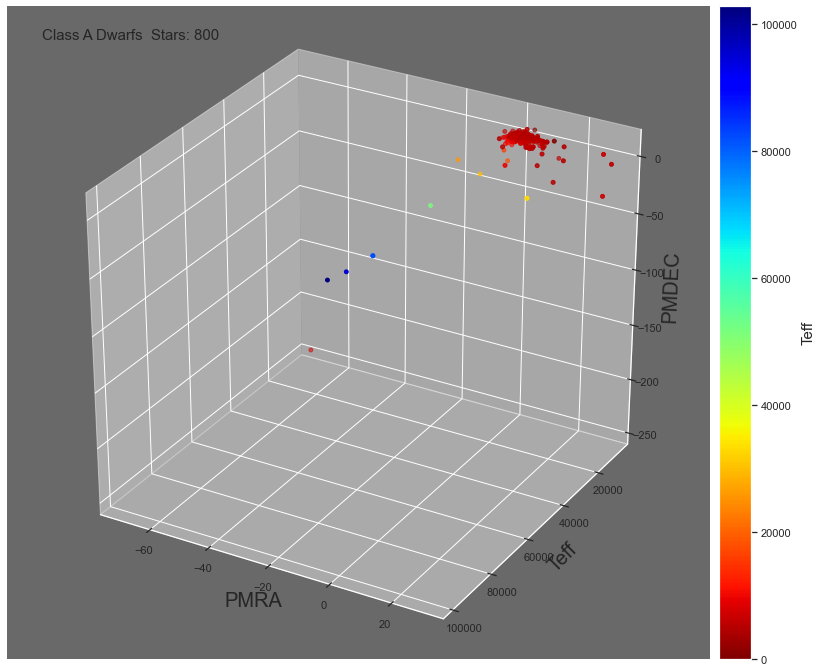

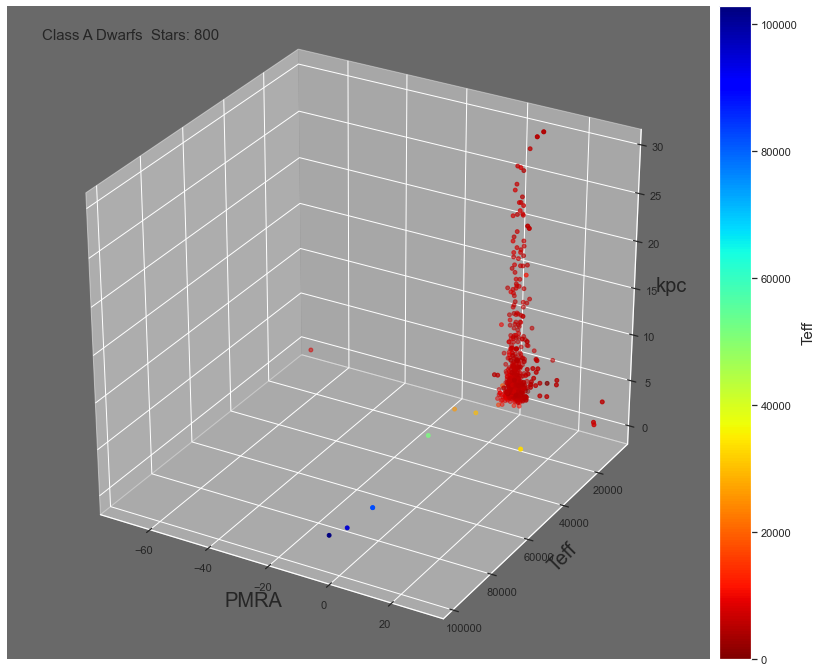

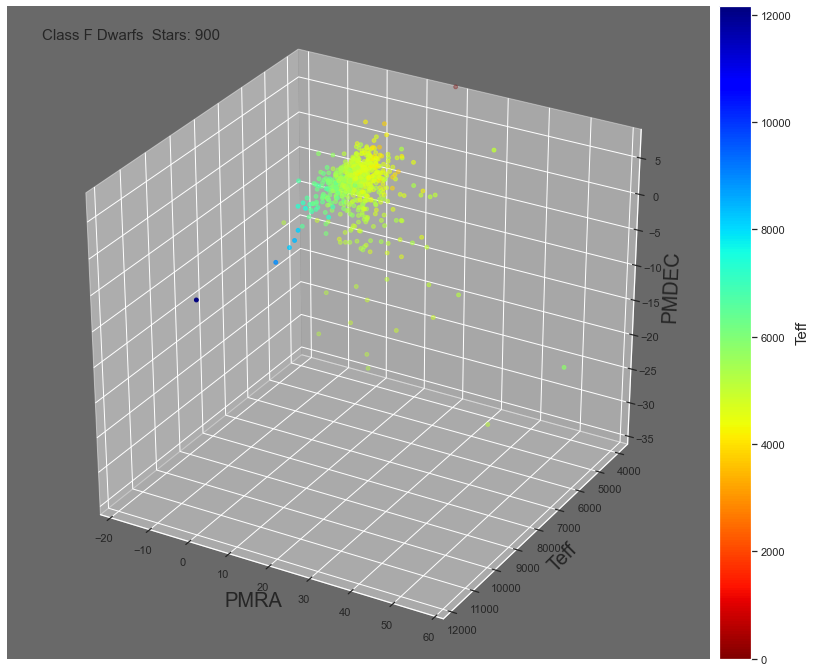

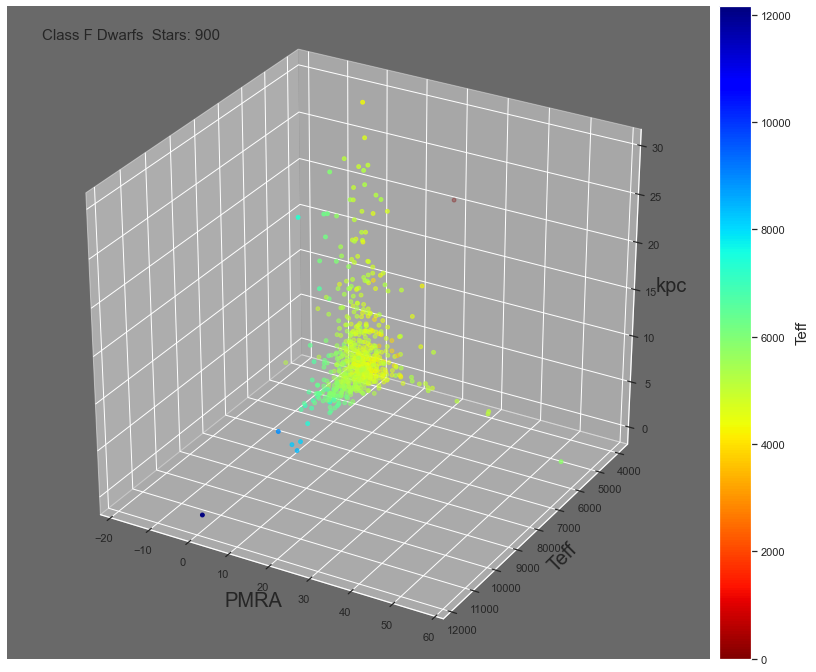

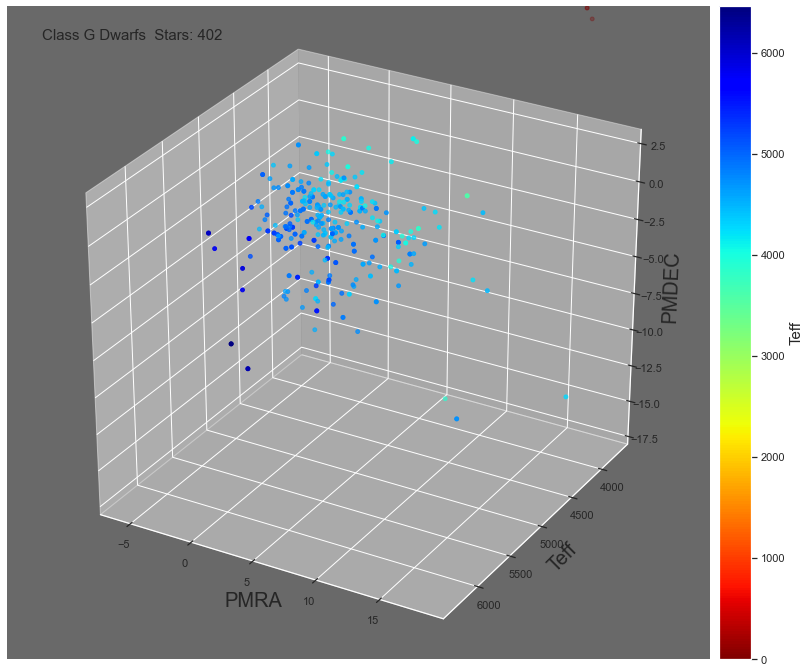

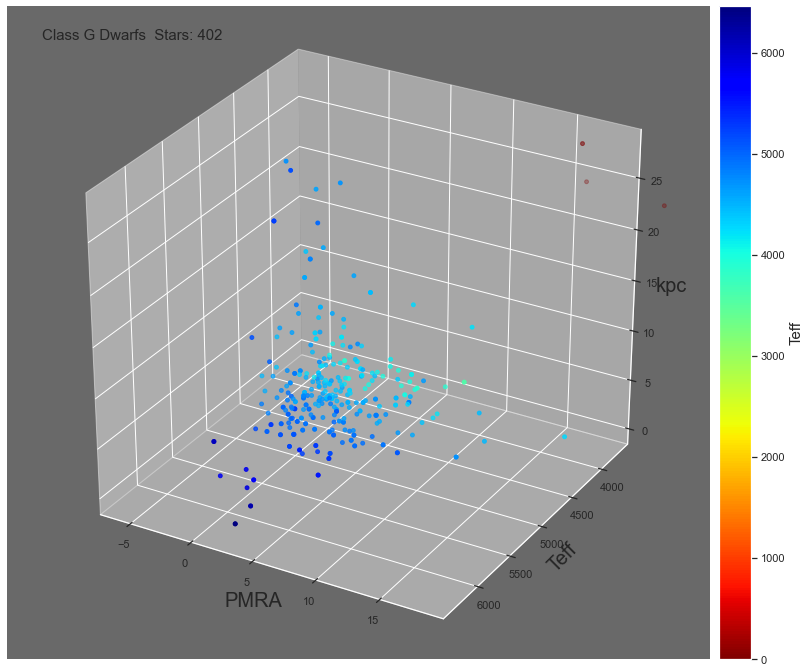

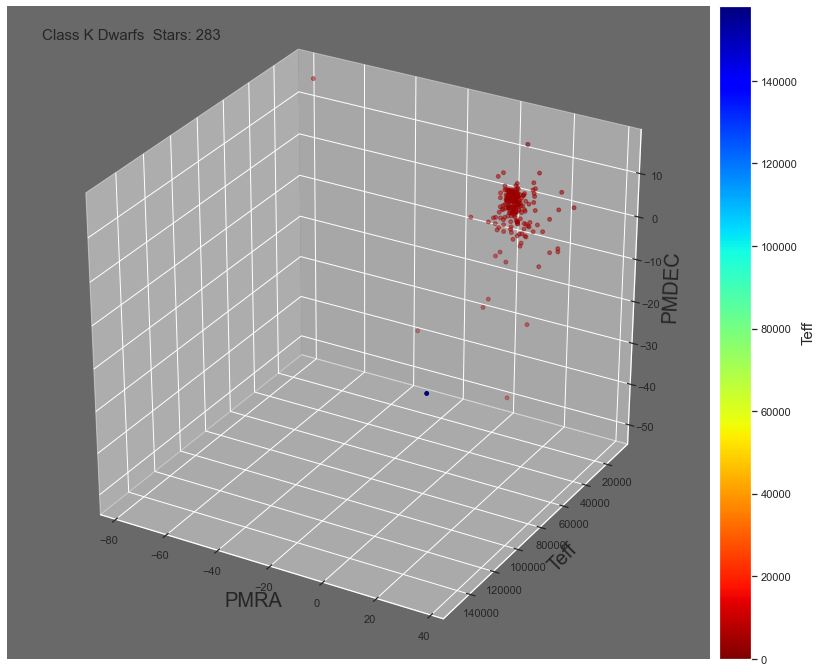

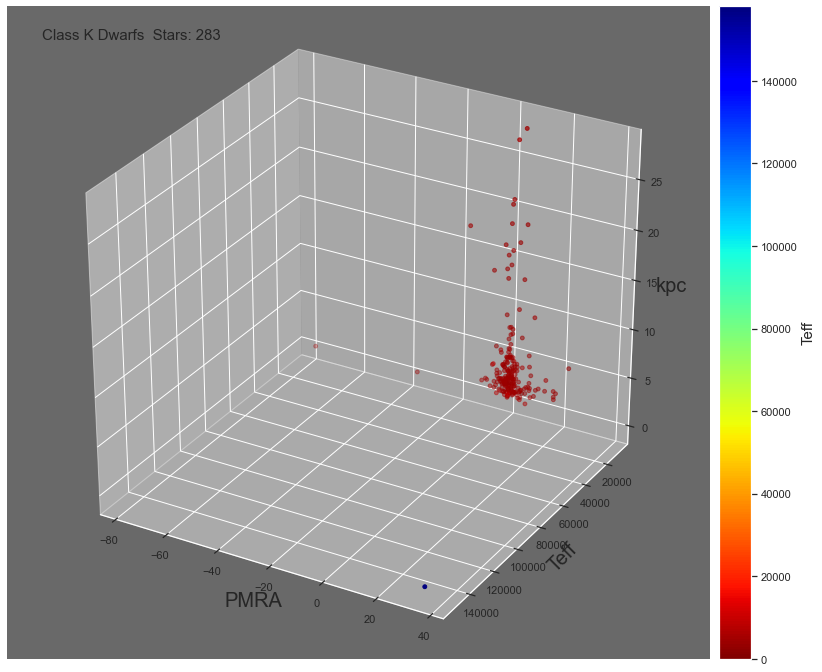

In [51]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
    
    plotSlice3DParmDensityLYPM(r, str(s),  "LightYears", "LY", "jet", 100000)
    
    print("\n")


Class B Dwarfs

Class O: 2
Class B: 186
Class A: 41
Class F: 85
Class G: 17
Class K: 12
Class M: 1
Class L: 0
Class T: 0




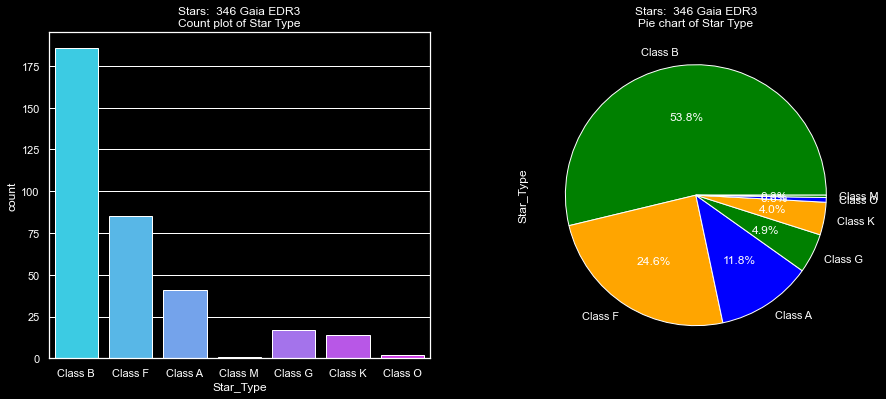




Class A Dwarfs

Class O: 8
Class B: 33
Class A: 186
Class F: 474
Class G: 59
Class K: 35
Class M: 0
Class L: 0
Class T: 0




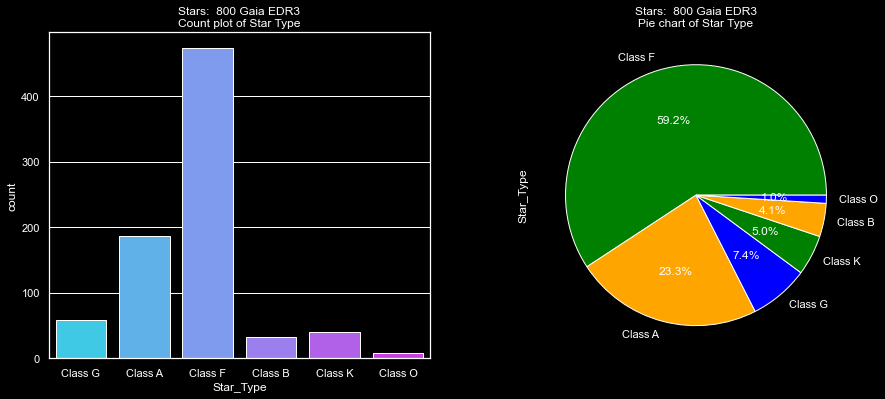




Class F Dwarfs

Class O: 4
Class B: 7
Class A: 49
Class F: 468
Class G: 283
Class K: 64
Class M: 2
Class L: 0
Class T: 0




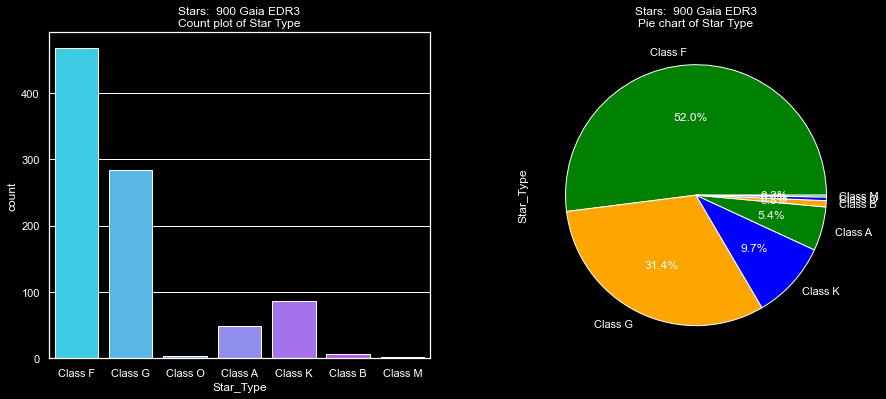




Class G Dwarfs

Class O: 6
Class B: 0
Class A: 14
Class F: 62
Class G: 179
Class K: 102
Class M: 0
Class L: 0
Class T: 0




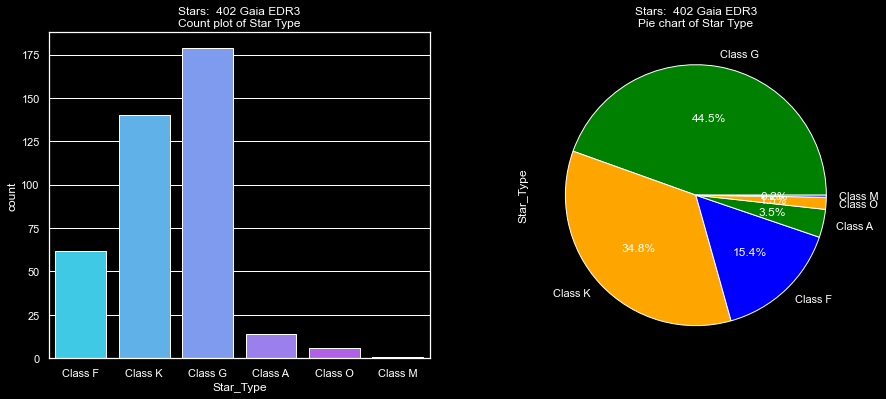




Class K Dwarfs

Class O: 3
Class B: 4
Class A: 14
Class F: 39
Class G: 48
Class K: 146
Class M: 2
Class L: 0
Class T: 0




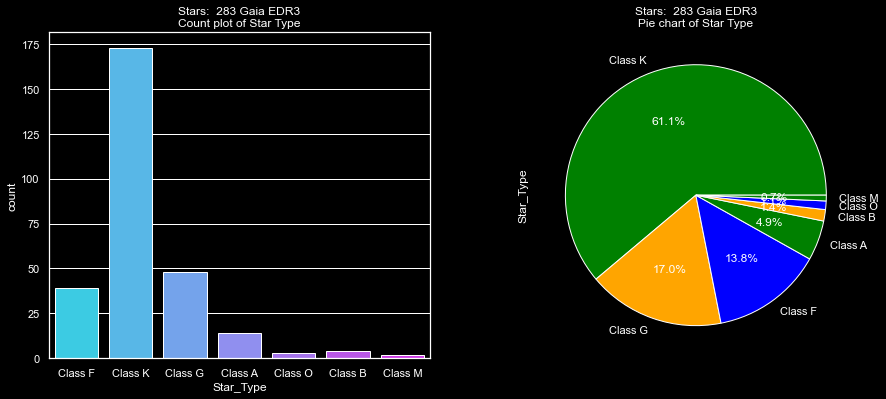

In [52]:
sns.set()

for r, s in [(class_B_dwarfs, target_B), (class_A_dwarfs, target_A),
             (class_F_dwarfs, target_F),(class_G_dwarfs, target_G), (class_K_dwarfs, target_K),
  ]:
   
    target = s

    f1 = r
    r1 = r
    
    print("\n" + str(s))

    df_class_O = f1[(f1['SpT2'] >= "O0V") & (f1['SpT2'] <= "O9V")]
    df_class_B = f1[(f1['SpT2'] >= "B0V") & (f1['SpT2'] <= "B9V")]
    df_class_A = f1[(f1['SpT2'] >= "A0V") & (f1['SpT2'] <= "A9V")]
    df_class_F = f1[(f1['SpT2'] >= "F0V") & (f1['SpT2'] <= "F9V")]
    df_class_G = f1[(f1['SpT2'] >= "G0V") & (f1['SpT2'] <= "G9V")]
    df_class_K = f1[(f1['SpT2'] >= "K0V") & (f1['SpT2'] <= "K9V")]
    df_class_M = f1[(f1['SpT2'] >= "M0V") & (f1['SpT2'] <= "M9V")]
    df_class_L = f1[(f1['SpT2'] >= "L0V") & (f1['SpT2'] <= "L9V")]
    df_class_T = f1[(f1['SpT2'] >= "T0V") & (f1['SpT2'] <= "T9V")]

    print("\nClass O: " + str(df_class_O.shape[0]))
    print("Class B: " + str(df_class_B.shape[0]))
    print("Class A: " + str(df_class_A.shape[0]))
    print("Class F: " + str(df_class_F.shape[0]))
    print("Class G: " + str(df_class_G.shape[0]))
    print("Class K: " + str(df_class_K.shape[0]))
    print("Class M: " + str(df_class_M.shape[0]))
    print("Class L: " + str(df_class_L.shape[0]))
    print("Class T: " + str(df_class_T.shape[0]))
    print("\n")

    f1['Star_Type'] = ""
    f1['Star_Type'] = np.where(f1.SpT2.between('O0', 'O9V'), 'Class O', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('B0', 'B9V'), 'Class B', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('A0', 'A9V'), 'Class A', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('F0', 'F9V'), 'Class F', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('G0', 'G9V'), 'Class G', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('K0', 'K9V'), 'Class K', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('M0', 'M9.5V'), 'Class M', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('L0', 'L9.5V'), 'Class L', f1['Star_Type'])
    f1['Star_Type'] = np.where(f1.SpT2.between('T0', 'T9.5V'), 'Class T', f1['Star_Type'])

    ####################################################################################################

    plt.style.use('dark_background')
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.countplot(x = 'Star_Type' , palette= 'cool', data= f1) 
    plt.title(str('Stars:  ' + str(r1.shape[0])) + ' Gaia EDR3'  + "\nCount plot of Star Type")

    plt.subplot(1,2,2)
    count = f1['Star_Type'].value_counts()
    count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'],
           title = str('Stars:  ' + str(r1.shape[0])) + ' Gaia EDR3'  + "\nPie chart of Star Type")
    plt.show()
    
    print("\n")

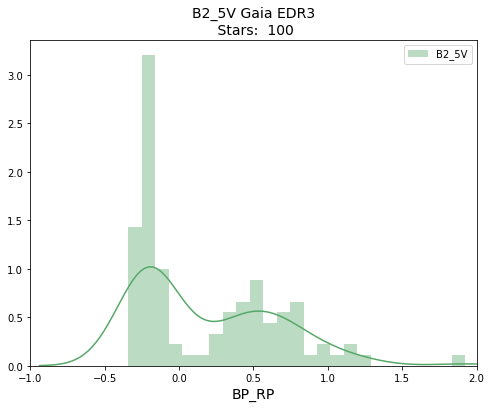

B2_5V  BP_RP Mean: 0.19    BP_RP Median: -0.09




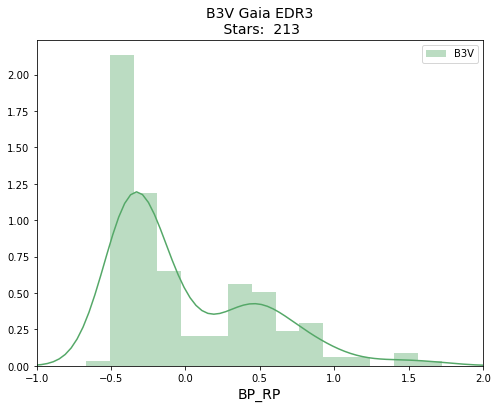

B3V  BP_RP Mean: -0.01    BP_RP Median: -0.23




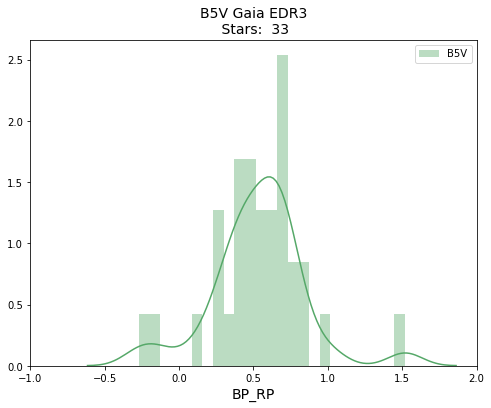

B5V  BP_RP Mean: 0.53    BP_RP Median: 0.55




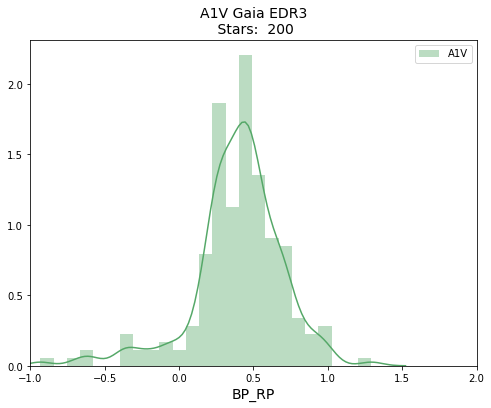

A1V  BP_RP Mean: 0.4    BP_RP Median: 0.43




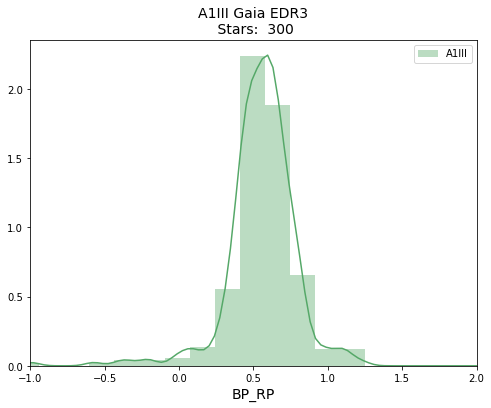

A1III  BP_RP Mean: 0.56    BP_RP Median: 0.57




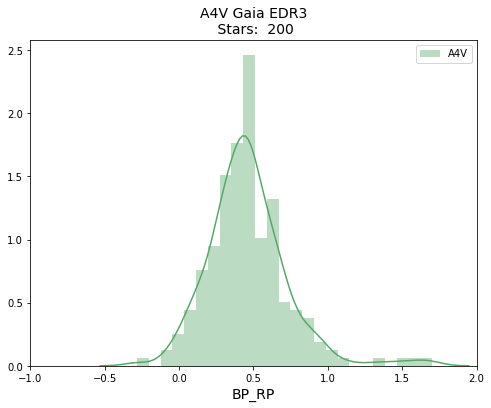

A4V  BP_RP Mean: 0.46    BP_RP Median: 0.44




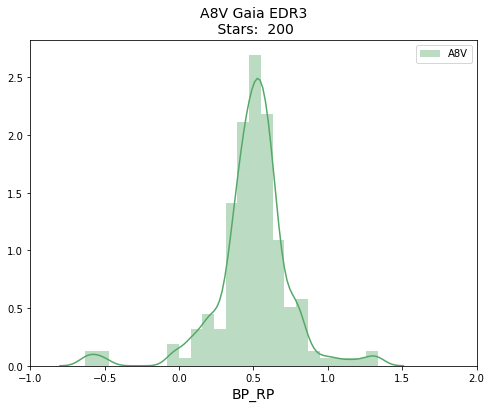

A8V  BP_RP Mean: 0.5    BP_RP Median: 0.52




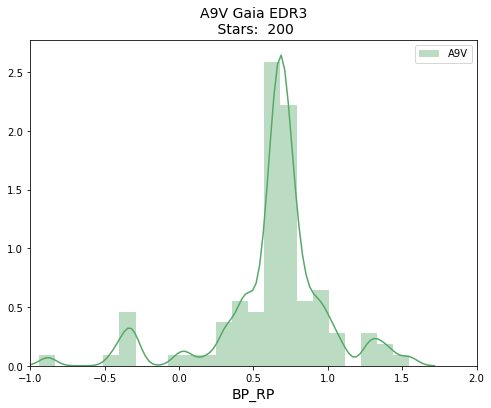

A9V  BP_RP Mean: 0.61    BP_RP Median: 0.68




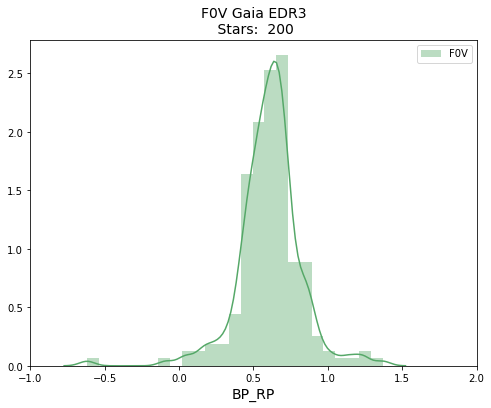

F0V  BP_RP Mean: 0.61    BP_RP Median: 0.61




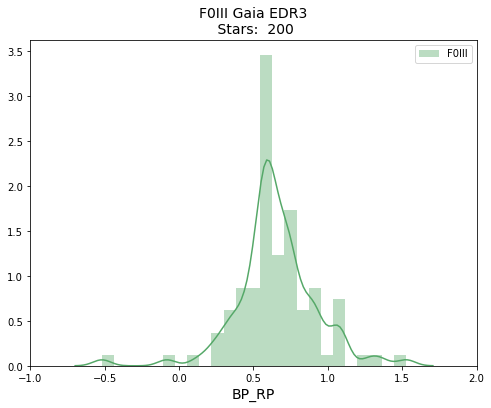

F0III  BP_RP Mean: 0.65    BP_RP Median: 0.62




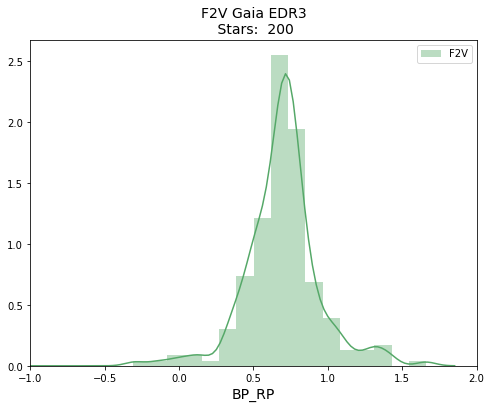

F2V  BP_RP Mean: 0.69    BP_RP Median: 0.7




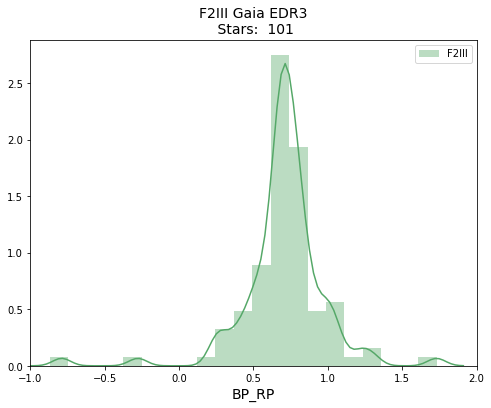

F2III  BP_RP Mean: 0.68    BP_RP Median: 0.72




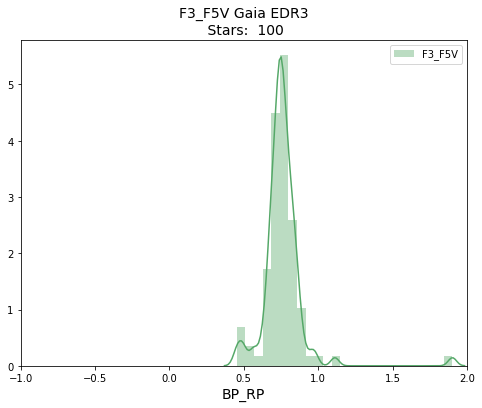

F3_F5V  BP_RP Mean: 0.76    BP_RP Median: 0.75




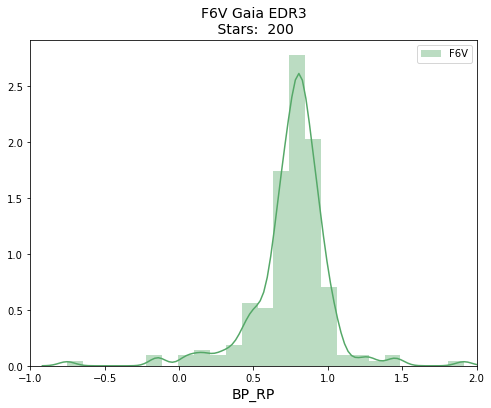

F6V  BP_RP Mean: 0.76    BP_RP Median: 0.79




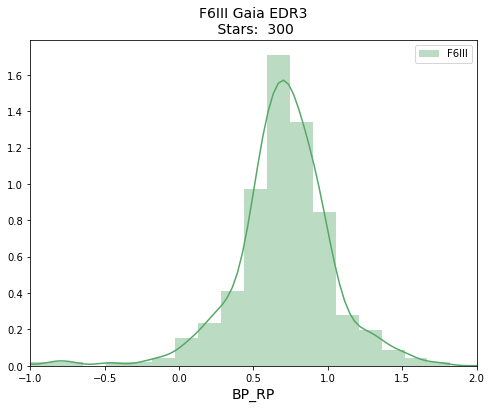

F6III  BP_RP Mean: 0.71    BP_RP Median: 0.72




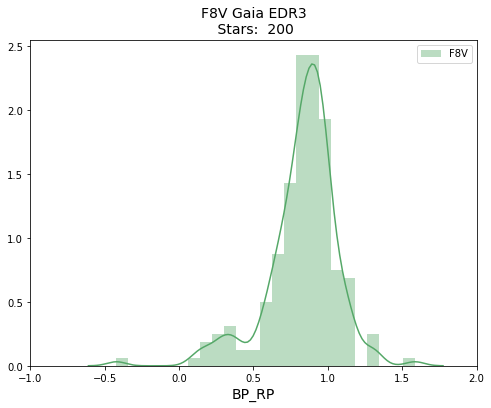

F8V  BP_RP Mean: 0.83    BP_RP Median: 0.86




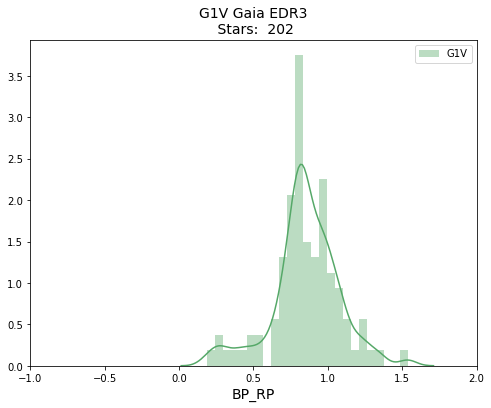

G1V  BP_RP Mean: 0.85    BP_RP Median: 0.83




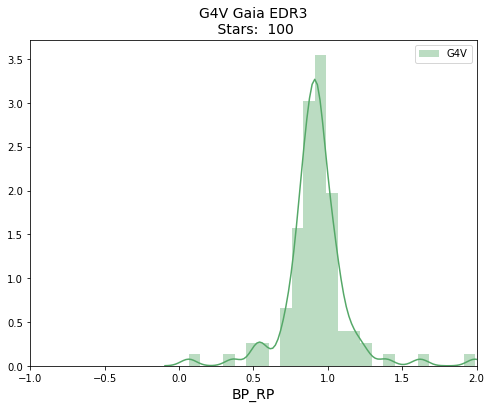

G4V  BP_RP Mean: 0.92    BP_RP Median: 0.92




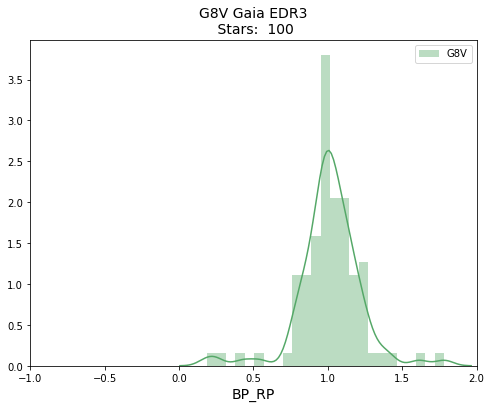

G8V  BP_RP Mean: 1.01    BP_RP Median: 1.01




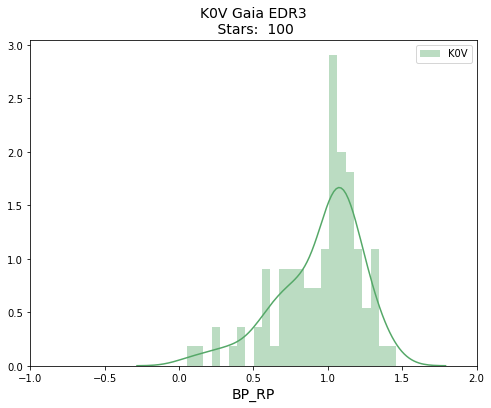

K0V  BP_RP Mean: 0.95    BP_RP Median: 1.03




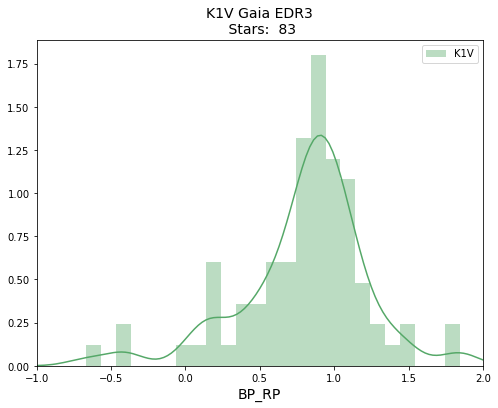

K1V  BP_RP Mean: 0.8    BP_RP Median: 0.87




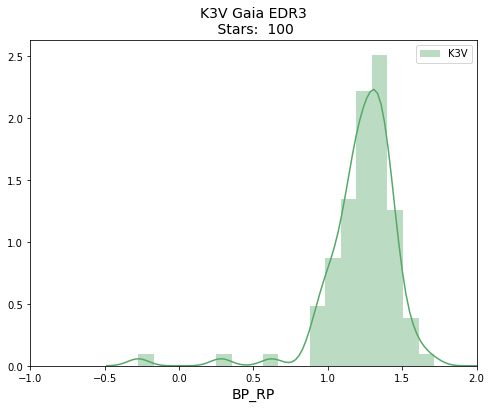

K3V  BP_RP Mean: 1.24    BP_RP Median: 1.27




In [53]:
sns.set()

for r, s in [(B2_5V, 'B2_5V'), (B3V,'B3V'),  (B5V,'B5V'),
 (A1V, 'A1V'),  (A1III, 'A1III'), (A4V, 'A4V'), (A8V, 'A8V'), (A9V, 'A9V'),
 (F0V, 'F0V'), (F0III, 'F0III'), (F2V, 'F2V'), (F2III, 'F2III'), (F3_F5V, 'F3_F5V'), (F6V, 'F6V'), (F6III, 'F6III'),
 (F8V, 'F8V'), (G1V, 'G1V'), (G4V, 'G4V'), (G8V, 'G8V'), (K0V, 'K0V'), (K1V, 'K1V'), (K3V, 'K3V'),
  ]:
    plt.rcParams.update(Ipython_default);
    plt.rcParams["figure.figsize"] = "8, 6"

    sns.distplot(r['bp_rp'],label=str(s),color='g',bins = 25,kde=True)


    plt.xlabel('BP_RP', fontsize=14)
    plt.xlim(-1, 2)

    plt.title(str(s) + ' Gaia EDR3' +
             '\n Stars:  ' + str(r.shape[0]), fontsize=14)

    plt.legend()
    plt.show()
    
    #print(str(s) + " \nBP_RP Mean: " + str(round(r['bp_rp'].mean(),2)))
    #print("BP_RP Median: " + str(round(r['bp_rp'].median(),2)))
    
    print(str(s) + "  BP_RP Mean: " + str(round(r['bp_rp'].mean(),2)) + 
                   "    BP_RP Median: " + str(round(r['bp_rp'].median(),2)))
    print("\n")